# Exercise 1

Work on this before the next lecture on 22 March. We will talk about questions, comments, and solutions during the exercise after the second lecture.

Please do form study groups! When you do, make sure you can explain everything in your own words, do not simply copy&paste from others.

The solutions to a lot of these problems can probably be found with Google. Please don't. You will not learn a lot by copy&pasting from the internet.

If you want to get credit/examination on this course please upload your work to **your GitHub repository** for this course **before** the next lecture starts and post a link to your repository [in this thread](https://github.com/wildtreetech/advanced-comp-2018/issues/1). If you worked on things together with others please add their names to the notebook so we can see who formed groups.


## Objective

There are two objectives for this set of exercises:

* get you started using python, scikit-learn, matplotlib, and GitHub. You will be using them a lot during the course, so make sure you get a good foundation to build on.

* working through the steps of opening a new dataset, plotting the data, fitting a model to it, evaluating your model, and deciding on model complexity.

## Question 0

Install python, scikit-learn (v0.19), matplotlib, jupyter and git.

Instructions for doing so: https://github.com/wildtreetech/advanced-comp-2018/blob/master/install.md

Documentation and guides for the various tools:

* [jupyter quickstart](http://jupyter.readthedocs.io/en/latest/content-quickstart.html)
* [try jupyter without installing anything](https://try.jupyter.org/)
* [matplotlib homepage](http://matplotlib.org/)
* [matplotlib gallery](http://matplotlib.org/gallery.html)
* [scikit-learn homepage](http://scikit-learn.org/stable/)
* [scikit-learn examples](http://scikit-learn.org/stable/auto_examples/index.html)
* [scikit-learn documentation](http://scikit-learn.org/stable/documentation.html)
* [try git online without installing anything](https://try.github.io/levels/1/challenges/1)


### GitHub and git

* [Create a GitHub account]() for yourself or use one you already have.
* Follow the guide on [creating a new repository](https://help.github.com/articles/create-a-repo/). Name the repository "advanced-comp-2018".

Read up on `git clone`, `git pull`, `git push`, `git add` and `git commit`. Once you master these five commands you should be good for this course. There is a whole universe of complex things that `git` can do for you, don't worry about them for now. Once you feel comfortable with the basics you can always step it up later.

---

These are some useful default imports for plotting and [`numpy`](http://www.numpy.org/)

In [35]:
%config InlineBackend.figure_format='retina'
%matplotlib inline

import numpy as np
np.random.seed(123)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (8, 8)
plt.rcParams["font.size"] = 14
from sklearn.utils import check_random_state
from tqdm import tqdm_notebook as tqdm

---

## Question 1

In the lecture we used the nearest neighbour classifier to classify points from a toy dataset into either "red" or "blue" classes. We investigated how the performance changes as a function of model complexity and what this means for the performance of our classifier on unseen data. 

* plot your dataset
* split your dataset into a training and testing set. Comment on how you decided to split your data.
* evaluate the performance of the classifier on your training dataset.
* evaluate the performance of the classifier on your testing dataset.
* repeat the above two steps for varying splits (10-90, 20-80, 30-70, ...) and comment
  on what you see. Is there a "best" way to split your data?
* comment on why the two performance estimates agree or disagree.
* plot the accuracy of the classifier as a function of `n_neighbors`.
* comment on the similarities and differences between the performance on the testing and training dataset.
* is a KNeighbor Classifier with 4 or 10 neighbors more complicated?
* find the best setting of `n_neighbors` for this dataset.
* why is this the best setting?

Use `make_blobs(n_samples=400, centers=23, random_state=42)` to create a simple dataset and use the `KNeighborsClassifier` classifier to answer the above questions.

In [2]:
from sklearn.datasets import make_blobs
from sklearn.neighbors import KNeighborsClassifier

labels = ["b", "r"]
X, y = make_blobs(n_samples=400, centers=23, random_state=688)
y = np.take(labels, (y < 10))

### Plot dataset

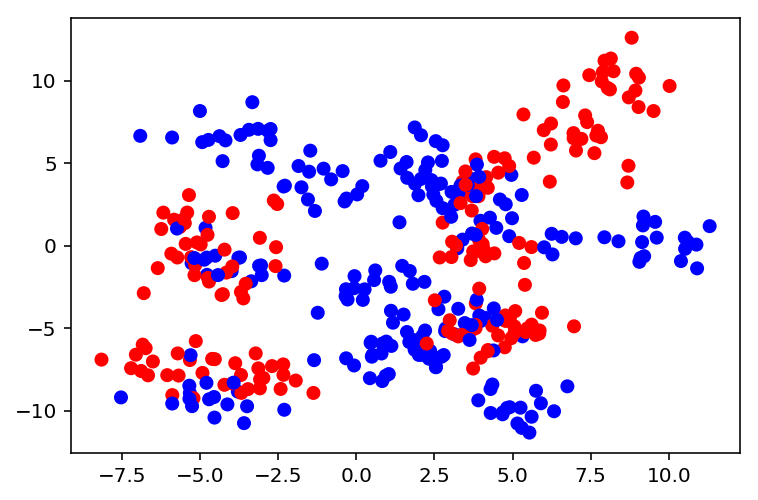

In [3]:
plt.figure()
plt.scatter(X[:,0], X[:, 1], color=y)

### Spliting the dataset

In [32]:
from sklearn.model_selection import train_test_split

def split(test_size, **kwargs):
        
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, train_size=1-test_size, **kwargs)
    
    return X_train, X_test, y_train, y_test

### Training

In [ ]:
from sklearn.metrics import accuracy_score

def train_and_compute_score(X_train, X_test, y_train, y_test):
    
    kneigh = KNeighborsClassifier()
    kneigh.fit(X_train, y_train)
    y_predict = kneigh.predict(X_test)
    score = accuracy_score(y_test, y_predict, normalize=True, sample_weight=None)
    return score

In [ ]:
test_sizes = np.linspace(10, 90, num=100) / 100
scores = np.zeros(test_sizes.shape)

n_trials = 100
for i, test_size in enumerate(test_sizes):
    
    for _ in tqdm(range(n_trials), leave=True):
    
        X_train, X_test, y_train, y_test = split(test_size, shuffle=True)
        scores[i] += train_and_compute_score(X_train, X_test, y_train, y_test)

scores /= n_trials
    
plt.figure()
plt.plot(test_sizes, scores)
    

HBox(children=(IntProgress(value=0), HTML(value='')))

0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1



HBox(children=(IntProgress(value=0), HTML(value='')))

0.10808080808080808
0.10808080808080808
0.10808080808080808
0.10808080808080808
0.10808080808080808
0.10808080808080808
0.10808080808080808
0.10808080808080808
0.10808080808080808
0.10808080808080808
0.10808080808080808
0.10808080808080808
0.10808080808080808
0.10808080808080808
0.10808080808080808
0.10808080808080808
0.10808080808080808
0.10808080808080808
0.10808080808080808
0.10808080808080808
0.10808080808080808
0.10808080808080808
0.10808080808080808
0.10808080808080808
0.10808080808080808
0.10808080808080808
0.10808080808080808
0.10808080808080808
0.10808080808080808
0.10808080808080808
0.10808080808080808
0.10808080808080808
0.10808080808080808
0.10808080808080808
0.10808080808080808
0.10808080808080808
0.10808080808080808
0.10808080808080808
0.10808080808080808
0.10808080808080808
0.10808080808080808
0.10808080808080808
0.10808080808080808
0.10808080808080808
0.10808080808080808
0.10808080808080808
0.10808080808080808
0.10808080808080808
0.10808080808080808
0.10808080808080808


HBox(children=(IntProgress(value=0), HTML(value='')))

0.11616161616161616
0.11616161616161616
0.11616161616161616
0.11616161616161616
0.11616161616161616
0.11616161616161616
0.11616161616161616
0.11616161616161616
0.11616161616161616
0.11616161616161616
0.11616161616161616
0.11616161616161616
0.11616161616161616
0.11616161616161616
0.11616161616161616
0.11616161616161616
0.11616161616161616
0.11616161616161616
0.11616161616161616
0.11616161616161616
0.11616161616161616
0.11616161616161616
0.11616161616161616
0.11616161616161616
0.11616161616161616
0.11616161616161616
0.11616161616161616
0.11616161616161616
0.11616161616161616
0.11616161616161616
0.11616161616161616
0.11616161616161616
0.11616161616161616
0.11616161616161616
0.11616161616161616
0.11616161616161616
0.11616161616161616
0.11616161616161616
0.11616161616161616
0.11616161616161616
0.11616161616161616
0.11616161616161616
0.11616161616161616
0.11616161616161616
0.11616161616161616
0.11616161616161616
0.11616161616161616
0.11616161616161616
0.11616161616161616
0.11616161616161616


HBox(children=(IntProgress(value=0), HTML(value='')))

0.12424242424242424
0.12424242424242424
0.12424242424242424
0.12424242424242424
0.12424242424242424
0.12424242424242424
0.12424242424242424
0.12424242424242424
0.12424242424242424
0.12424242424242424
0.12424242424242424
0.12424242424242424
0.12424242424242424
0.12424242424242424
0.12424242424242424
0.12424242424242424
0.12424242424242424
0.12424242424242424
0.12424242424242424
0.12424242424242424
0.12424242424242424
0.12424242424242424
0.12424242424242424
0.12424242424242424
0.12424242424242424
0.12424242424242424
0.12424242424242424
0.12424242424242424
0.12424242424242424
0.12424242424242424
0.12424242424242424
0.12424242424242424
0.12424242424242424
0.12424242424242424
0.12424242424242424
0.12424242424242424
0.12424242424242424
0.12424242424242424
0.12424242424242424
0.12424242424242424
0.12424242424242424
0.12424242424242424
0.12424242424242424
0.12424242424242424
0.12424242424242424
0.12424242424242424
0.12424242424242424
0.12424242424242424
0.12424242424242424
0.12424242424242424


HBox(children=(IntProgress(value=0), HTML(value='')))

0.13232323232323231
0.13232323232323231
0.13232323232323231
0.13232323232323231
0.13232323232323231
0.13232323232323231
0.13232323232323231
0.13232323232323231
0.13232323232323231
0.13232323232323231
0.13232323232323231
0.13232323232323231
0.13232323232323231
0.13232323232323231
0.13232323232323231
0.13232323232323231
0.13232323232323231
0.13232323232323231
0.13232323232323231
0.13232323232323231
0.13232323232323231
0.13232323232323231
0.13232323232323231
0.13232323232323231
0.13232323232323231
0.13232323232323231
0.13232323232323231
0.13232323232323231
0.13232323232323231
0.13232323232323231
0.13232323232323231
0.13232323232323231
0.13232323232323231
0.13232323232323231
0.13232323232323231
0.13232323232323231
0.13232323232323231
0.13232323232323231
0.13232323232323231
0.13232323232323231
0.13232323232323231
0.13232323232323231
0.13232323232323231
0.13232323232323231
0.13232323232323231
0.13232323232323231
0.13232323232323231
0.13232323232323231
0.13232323232323231
0.13232323232323231


HBox(children=(IntProgress(value=0), HTML(value='')))

0.14040404040404042
0.14040404040404042
0.14040404040404042
0.14040404040404042
0.14040404040404042
0.14040404040404042
0.14040404040404042
0.14040404040404042
0.14040404040404042
0.14040404040404042
0.14040404040404042
0.14040404040404042
0.14040404040404042
0.14040404040404042
0.14040404040404042
0.14040404040404042
0.14040404040404042
0.14040404040404042
0.14040404040404042
0.14040404040404042
0.14040404040404042
0.14040404040404042
0.14040404040404042
0.14040404040404042
0.14040404040404042
0.14040404040404042
0.14040404040404042
0.14040404040404042
0.14040404040404042
0.14040404040404042
0.14040404040404042
0.14040404040404042
0.14040404040404042
0.14040404040404042
0.14040404040404042
0.14040404040404042
0.14040404040404042
0.14040404040404042
0.14040404040404042
0.14040404040404042
0.14040404040404042
0.14040404040404042
0.14040404040404042
0.14040404040404042
0.14040404040404042
0.14040404040404042
0.14040404040404042
0.14040404040404042
0.14040404040404042
0.14040404040404042


HBox(children=(IntProgress(value=0), HTML(value='')))

0.14848484848484847
0.14848484848484847
0.14848484848484847
0.14848484848484847
0.14848484848484847
0.14848484848484847
0.14848484848484847
0.14848484848484847
0.14848484848484847
0.14848484848484847
0.14848484848484847
0.14848484848484847
0.14848484848484847
0.14848484848484847
0.14848484848484847
0.14848484848484847
0.14848484848484847
0.14848484848484847
0.14848484848484847
0.14848484848484847
0.14848484848484847
0.14848484848484847
0.14848484848484847
0.14848484848484847
0.14848484848484847
0.14848484848484847
0.14848484848484847
0.14848484848484847
0.14848484848484847
0.14848484848484847
0.14848484848484847
0.14848484848484847
0.14848484848484847
0.14848484848484847
0.14848484848484847
0.14848484848484847
0.14848484848484847
0.14848484848484847
0.14848484848484847
0.14848484848484847
0.14848484848484847
0.14848484848484847
0.14848484848484847
0.14848484848484847
0.14848484848484847
0.14848484848484847
0.14848484848484847
0.14848484848484847
0.14848484848484847
0.14848484848484847


HBox(children=(IntProgress(value=0), HTML(value='')))

0.15656565656565657
0.15656565656565657
0.15656565656565657
0.15656565656565657
0.15656565656565657
0.15656565656565657
0.15656565656565657
0.15656565656565657
0.15656565656565657
0.15656565656565657
0.15656565656565657
0.15656565656565657
0.15656565656565657
0.15656565656565657
0.15656565656565657
0.15656565656565657
0.15656565656565657
0.15656565656565657
0.15656565656565657
0.15656565656565657
0.15656565656565657
0.15656565656565657
0.15656565656565657
0.15656565656565657
0.15656565656565657
0.15656565656565657
0.15656565656565657
0.15656565656565657
0.15656565656565657
0.15656565656565657
0.15656565656565657
0.15656565656565657
0.15656565656565657
0.15656565656565657
0.15656565656565657
0.15656565656565657
0.15656565656565657
0.15656565656565657
0.15656565656565657
0.15656565656565657
0.15656565656565657
0.15656565656565657
0.15656565656565657
0.15656565656565657
0.15656565656565657
0.15656565656565657
0.15656565656565657
0.15656565656565657
0.15656565656565657
0.15656565656565657


HBox(children=(IntProgress(value=0), HTML(value='')))

0.16464646464646462
0.16464646464646462
0.16464646464646462
0.16464646464646462
0.16464646464646462
0.16464646464646462
0.16464646464646462
0.16464646464646462
0.16464646464646462
0.16464646464646462
0.16464646464646462
0.16464646464646462
0.16464646464646462
0.16464646464646462
0.16464646464646462
0.16464646464646462
0.16464646464646462
0.16464646464646462
0.16464646464646462
0.16464646464646462
0.16464646464646462
0.16464646464646462
0.16464646464646462
0.16464646464646462
0.16464646464646462
0.16464646464646462
0.16464646464646462
0.16464646464646462
0.16464646464646462
0.16464646464646462
0.16464646464646462
0.16464646464646462
0.16464646464646462
0.16464646464646462
0.16464646464646462
0.16464646464646462
0.16464646464646462
0.16464646464646462
0.16464646464646462
0.16464646464646462
0.16464646464646462
0.16464646464646462
0.16464646464646462
0.16464646464646462
0.16464646464646462
0.16464646464646462
0.16464646464646462
0.16464646464646462
0.16464646464646462
0.16464646464646462


HBox(children=(IntProgress(value=0), HTML(value='')))

0.17272727272727273
0.17272727272727273
0.17272727272727273
0.17272727272727273
0.17272727272727273
0.17272727272727273
0.17272727272727273
0.17272727272727273
0.17272727272727273
0.17272727272727273
0.17272727272727273
0.17272727272727273
0.17272727272727273
0.17272727272727273
0.17272727272727273
0.17272727272727273
0.17272727272727273
0.17272727272727273
0.17272727272727273
0.17272727272727273
0.17272727272727273
0.17272727272727273
0.17272727272727273
0.17272727272727273
0.17272727272727273
0.17272727272727273
0.17272727272727273
0.17272727272727273
0.17272727272727273
0.17272727272727273
0.17272727272727273
0.17272727272727273
0.17272727272727273
0.17272727272727273
0.17272727272727273
0.17272727272727273
0.17272727272727273
0.17272727272727273
0.17272727272727273
0.17272727272727273
0.17272727272727273
0.17272727272727273
0.17272727272727273
0.17272727272727273
0.17272727272727273
0.17272727272727273
0.17272727272727273
0.17272727272727273
0.17272727272727273
0.17272727272727273


HBox(children=(IntProgress(value=0), HTML(value='')))

0.18080808080808083
0.18080808080808083
0.18080808080808083
0.18080808080808083
0.18080808080808083
0.18080808080808083
0.18080808080808083
0.18080808080808083
0.18080808080808083
0.18080808080808083
0.18080808080808083
0.18080808080808083
0.18080808080808083
0.18080808080808083
0.18080808080808083
0.18080808080808083
0.18080808080808083
0.18080808080808083
0.18080808080808083
0.18080808080808083
0.18080808080808083
0.18080808080808083
0.18080808080808083
0.18080808080808083
0.18080808080808083
0.18080808080808083
0.18080808080808083
0.18080808080808083
0.18080808080808083
0.18080808080808083
0.18080808080808083
0.18080808080808083
0.18080808080808083
0.18080808080808083
0.18080808080808083
0.18080808080808083
0.18080808080808083
0.18080808080808083
0.18080808080808083
0.18080808080808083
0.18080808080808083
0.18080808080808083
0.18080808080808083
0.18080808080808083
0.18080808080808083
0.18080808080808083
0.18080808080808083
0.18080808080808083
0.18080808080808083
0.18080808080808083


HBox(children=(IntProgress(value=0), HTML(value='')))

0.18888888888888888
0.18888888888888888
0.18888888888888888
0.18888888888888888
0.18888888888888888
0.18888888888888888
0.18888888888888888
0.18888888888888888
0.18888888888888888
0.18888888888888888
0.18888888888888888
0.18888888888888888
0.18888888888888888
0.18888888888888888
0.18888888888888888
0.18888888888888888
0.18888888888888888
0.18888888888888888
0.18888888888888888
0.18888888888888888
0.18888888888888888
0.18888888888888888
0.18888888888888888
0.18888888888888888
0.18888888888888888
0.18888888888888888
0.18888888888888888
0.18888888888888888
0.18888888888888888
0.18888888888888888
0.18888888888888888
0.18888888888888888
0.18888888888888888
0.18888888888888888
0.18888888888888888
0.18888888888888888
0.18888888888888888
0.18888888888888888
0.18888888888888888
0.18888888888888888
0.18888888888888888
0.18888888888888888
0.18888888888888888
0.18888888888888888
0.18888888888888888
0.18888888888888888
0.18888888888888888
0.18888888888888888
0.18888888888888888
0.18888888888888888


HBox(children=(IntProgress(value=0), HTML(value='')))

0.19696969696969696
0.19696969696969696
0.19696969696969696
0.19696969696969696
0.19696969696969696
0.19696969696969696
0.19696969696969696
0.19696969696969696
0.19696969696969696
0.19696969696969696
0.19696969696969696
0.19696969696969696
0.19696969696969696
0.19696969696969696
0.19696969696969696
0.19696969696969696
0.19696969696969696
0.19696969696969696
0.19696969696969696
0.19696969696969696
0.19696969696969696
0.19696969696969696
0.19696969696969696
0.19696969696969696
0.19696969696969696
0.19696969696969696
0.19696969696969696
0.19696969696969696
0.19696969696969696
0.19696969696969696
0.19696969696969696
0.19696969696969696
0.19696969696969696
0.19696969696969696
0.19696969696969696
0.19696969696969696
0.19696969696969696
0.19696969696969696
0.19696969696969696
0.19696969696969696
0.19696969696969696
0.19696969696969696
0.19696969696969696
0.19696969696969696
0.19696969696969696
0.19696969696969696
0.19696969696969696
0.19696969696969696
0.19696969696969696
0.19696969696969696


HBox(children=(IntProgress(value=0), HTML(value='')))

0.20505050505050504
0.20505050505050504
0.20505050505050504
0.20505050505050504
0.20505050505050504
0.20505050505050504
0.20505050505050504
0.20505050505050504
0.20505050505050504
0.20505050505050504
0.20505050505050504
0.20505050505050504
0.20505050505050504
0.20505050505050504
0.20505050505050504
0.20505050505050504
0.20505050505050504
0.20505050505050504
0.20505050505050504
0.20505050505050504
0.20505050505050504
0.20505050505050504
0.20505050505050504
0.20505050505050504
0.20505050505050504
0.20505050505050504
0.20505050505050504
0.20505050505050504
0.20505050505050504
0.20505050505050504
0.20505050505050504
0.20505050505050504
0.20505050505050504
0.20505050505050504
0.20505050505050504
0.20505050505050504
0.20505050505050504
0.20505050505050504
0.20505050505050504
0.20505050505050504
0.20505050505050504
0.20505050505050504
0.20505050505050504
0.20505050505050504
0.20505050505050504
0.20505050505050504
0.20505050505050504
0.20505050505050504
0.20505050505050504
0.20505050505050504


HBox(children=(IntProgress(value=0), HTML(value='')))

0.21313131313131314
0.21313131313131314
0.21313131313131314
0.21313131313131314
0.21313131313131314
0.21313131313131314
0.21313131313131314
0.21313131313131314
0.21313131313131314
0.21313131313131314
0.21313131313131314
0.21313131313131314
0.21313131313131314
0.21313131313131314
0.21313131313131314
0.21313131313131314
0.21313131313131314
0.21313131313131314
0.21313131313131314
0.21313131313131314
0.21313131313131314
0.21313131313131314
0.21313131313131314
0.21313131313131314
0.21313131313131314
0.21313131313131314
0.21313131313131314
0.21313131313131314
0.21313131313131314
0.21313131313131314
0.21313131313131314
0.21313131313131314
0.21313131313131314
0.21313131313131314
0.21313131313131314
0.21313131313131314
0.21313131313131314
0.21313131313131314
0.21313131313131314
0.21313131313131314
0.21313131313131314
0.21313131313131314
0.21313131313131314
0.21313131313131314
0.21313131313131314
0.21313131313131314
0.21313131313131314
0.21313131313131314
0.21313131313131314
0.21313131313131314


HBox(children=(IntProgress(value=0), HTML(value='')))

0.22121212121212122
0.22121212121212122
0.22121212121212122
0.22121212121212122
0.22121212121212122
0.22121212121212122
0.22121212121212122
0.22121212121212122
0.22121212121212122
0.22121212121212122
0.22121212121212122
0.22121212121212122
0.22121212121212122
0.22121212121212122
0.22121212121212122
0.22121212121212122
0.22121212121212122
0.22121212121212122
0.22121212121212122
0.22121212121212122
0.22121212121212122
0.22121212121212122
0.22121212121212122
0.22121212121212122
0.22121212121212122
0.22121212121212122
0.22121212121212122
0.22121212121212122
0.22121212121212122
0.22121212121212122
0.22121212121212122
0.22121212121212122
0.22121212121212122
0.22121212121212122
0.22121212121212122
0.22121212121212122
0.22121212121212122
0.22121212121212122
0.22121212121212122
0.22121212121212122
0.22121212121212122
0.22121212121212122
0.22121212121212122
0.22121212121212122
0.22121212121212122
0.22121212121212122
0.22121212121212122
0.22121212121212122
0.22121212121212122
0.22121212121212122


HBox(children=(IntProgress(value=0), HTML(value='')))

0.22929292929292927
0.22929292929292927
0.22929292929292927
0.22929292929292927
0.22929292929292927
0.22929292929292927
0.22929292929292927
0.22929292929292927
0.22929292929292927
0.22929292929292927
0.22929292929292927
0.22929292929292927
0.22929292929292927
0.22929292929292927
0.22929292929292927
0.22929292929292927
0.22929292929292927
0.22929292929292927
0.22929292929292927
0.22929292929292927
0.22929292929292927
0.22929292929292927
0.22929292929292927
0.22929292929292927
0.22929292929292927
0.22929292929292927
0.22929292929292927
0.22929292929292927
0.22929292929292927
0.22929292929292927
0.22929292929292927
0.22929292929292927
0.22929292929292927
0.22929292929292927
0.22929292929292927
0.22929292929292927
0.22929292929292927
0.22929292929292927
0.22929292929292927
0.22929292929292927
0.22929292929292927
0.22929292929292927
0.22929292929292927
0.22929292929292927
0.22929292929292927
0.22929292929292927
0.22929292929292927
0.22929292929292927
0.22929292929292927
0.22929292929292927


HBox(children=(IntProgress(value=0), HTML(value='')))

0.23737373737373738
0.23737373737373738
0.23737373737373738
0.23737373737373738
0.23737373737373738
0.23737373737373738
0.23737373737373738
0.23737373737373738
0.23737373737373738
0.23737373737373738
0.23737373737373738
0.23737373737373738
0.23737373737373738
0.23737373737373738
0.23737373737373738
0.23737373737373738
0.23737373737373738
0.23737373737373738
0.23737373737373738
0.23737373737373738
0.23737373737373738
0.23737373737373738
0.23737373737373738
0.23737373737373738
0.23737373737373738
0.23737373737373738
0.23737373737373738
0.23737373737373738
0.23737373737373738
0.23737373737373738
0.23737373737373738
0.23737373737373738
0.23737373737373738
0.23737373737373738
0.23737373737373738
0.23737373737373738
0.23737373737373738
0.23737373737373738
0.23737373737373738
0.23737373737373738
0.23737373737373738
0.23737373737373738
0.23737373737373738
0.23737373737373738
0.23737373737373738
0.23737373737373738
0.23737373737373738
0.23737373737373738
0.23737373737373738
0.23737373737373738


HBox(children=(IntProgress(value=0), HTML(value='')))

0.24545454545454548
0.24545454545454548
0.24545454545454548
0.24545454545454548
0.24545454545454548
0.24545454545454548
0.24545454545454548
0.24545454545454548
0.24545454545454548
0.24545454545454548
0.24545454545454548
0.24545454545454548
0.24545454545454548
0.24545454545454548
0.24545454545454548
0.24545454545454548
0.24545454545454548
0.24545454545454548
0.24545454545454548
0.24545454545454548
0.24545454545454548
0.24545454545454548
0.24545454545454548
0.24545454545454548
0.24545454545454548
0.24545454545454548
0.24545454545454548
0.24545454545454548
0.24545454545454548
0.24545454545454548
0.24545454545454548
0.24545454545454548
0.24545454545454548
0.24545454545454548
0.24545454545454548
0.24545454545454548
0.24545454545454548
0.24545454545454548
0.24545454545454548
0.24545454545454548
0.24545454545454548
0.24545454545454548
0.24545454545454548
0.24545454545454548
0.24545454545454548
0.24545454545454548
0.24545454545454548
0.24545454545454548
0.24545454545454548
0.24545454545454548


HBox(children=(IntProgress(value=0), HTML(value='')))

0.2535353535353535
0.2535353535353535
0.2535353535353535
0.2535353535353535
0.2535353535353535
0.2535353535353535
0.2535353535353535
0.2535353535353535
0.2535353535353535
0.2535353535353535
0.2535353535353535
0.2535353535353535
0.2535353535353535
0.2535353535353535
0.2535353535353535
0.2535353535353535
0.2535353535353535
0.2535353535353535
0.2535353535353535
0.2535353535353535
0.2535353535353535
0.2535353535353535
0.2535353535353535
0.2535353535353535
0.2535353535353535
0.2535353535353535
0.2535353535353535
0.2535353535353535
0.2535353535353535
0.2535353535353535
0.2535353535353535
0.2535353535353535
0.2535353535353535
0.2535353535353535
0.2535353535353535
0.2535353535353535
0.2535353535353535
0.2535353535353535
0.2535353535353535
0.2535353535353535
0.2535353535353535
0.2535353535353535
0.2535353535353535
0.2535353535353535
0.2535353535353535
0.2535353535353535
0.2535353535353535
0.2535353535353535
0.2535353535353535
0.2535353535353535
0.2535353535353535
0.2535353535353535
0.2535353535

HBox(children=(IntProgress(value=0), HTML(value='')))

0.26161616161616164
0.26161616161616164
0.26161616161616164
0.26161616161616164
0.26161616161616164
0.26161616161616164
0.26161616161616164
0.26161616161616164
0.26161616161616164
0.26161616161616164
0.26161616161616164
0.26161616161616164
0.26161616161616164
0.26161616161616164
0.26161616161616164
0.26161616161616164
0.26161616161616164
0.26161616161616164
0.26161616161616164
0.26161616161616164
0.26161616161616164
0.26161616161616164
0.26161616161616164
0.26161616161616164
0.26161616161616164
0.26161616161616164
0.26161616161616164
0.26161616161616164
0.26161616161616164
0.26161616161616164
0.26161616161616164
0.26161616161616164
0.26161616161616164
0.26161616161616164
0.26161616161616164
0.26161616161616164
0.26161616161616164
0.26161616161616164
0.26161616161616164
0.26161616161616164
0.26161616161616164
0.26161616161616164
0.26161616161616164
0.26161616161616164
0.26161616161616164
0.26161616161616164
0.26161616161616164
0.26161616161616164
0.26161616161616164
0.26161616161616164


HBox(children=(IntProgress(value=0), HTML(value='')))

0.2696969696969697
0.2696969696969697
0.2696969696969697
0.2696969696969697
0.2696969696969697
0.2696969696969697
0.2696969696969697
0.2696969696969697
0.2696969696969697
0.2696969696969697
0.2696969696969697
0.2696969696969697
0.2696969696969697
0.2696969696969697
0.2696969696969697
0.2696969696969697
0.2696969696969697
0.2696969696969697
0.2696969696969697
0.2696969696969697
0.2696969696969697
0.2696969696969697
0.2696969696969697
0.2696969696969697
0.2696969696969697
0.2696969696969697
0.2696969696969697
0.2696969696969697
0.2696969696969697
0.2696969696969697
0.2696969696969697
0.2696969696969697
0.2696969696969697
0.2696969696969697
0.2696969696969697
0.2696969696969697
0.2696969696969697
0.2696969696969697
0.2696969696969697
0.2696969696969697
0.2696969696969697
0.2696969696969697
0.2696969696969697
0.2696969696969697
0.2696969696969697
0.2696969696969697
0.2696969696969697
0.2696969696969697
0.2696969696969697
0.2696969696969697
0.2696969696969697
0.2696969696969697
0.2696969696

HBox(children=(IntProgress(value=0), HTML(value='')))

0.2777777777777778
0.2777777777777778
0.2777777777777778
0.2777777777777778
0.2777777777777778
0.2777777777777778
0.2777777777777778
0.2777777777777778
0.2777777777777778
0.2777777777777778
0.2777777777777778
0.2777777777777778
0.2777777777777778
0.2777777777777778
0.2777777777777778
0.2777777777777778
0.2777777777777778
0.2777777777777778
0.2777777777777778
0.2777777777777778
0.2777777777777778
0.2777777777777778
0.2777777777777778
0.2777777777777778
0.2777777777777778
0.2777777777777778
0.2777777777777778
0.2777777777777778
0.2777777777777778
0.2777777777777778
0.2777777777777778
0.2777777777777778
0.2777777777777778
0.2777777777777778
0.2777777777777778
0.2777777777777778
0.2777777777777778
0.2777777777777778
0.2777777777777778
0.2777777777777778
0.2777777777777778
0.2777777777777778
0.2777777777777778
0.2777777777777778
0.2777777777777778
0.2777777777777778
0.2777777777777778
0.2777777777777778
0.2777777777777778
0.2777777777777778
0.2777777777777778
0.2777777777777778
0.2777777777

HBox(children=(IntProgress(value=0), HTML(value='')))

0.28585858585858587
0.28585858585858587
0.28585858585858587
0.28585858585858587
0.28585858585858587
0.28585858585858587
0.28585858585858587
0.28585858585858587
0.28585858585858587
0.28585858585858587
0.28585858585858587
0.28585858585858587
0.28585858585858587
0.28585858585858587
0.28585858585858587
0.28585858585858587
0.28585858585858587
0.28585858585858587
0.28585858585858587
0.28585858585858587
0.28585858585858587
0.28585858585858587
0.28585858585858587
0.28585858585858587
0.28585858585858587
0.28585858585858587
0.28585858585858587
0.28585858585858587
0.28585858585858587
0.28585858585858587
0.28585858585858587
0.28585858585858587
0.28585858585858587
0.28585858585858587
0.28585858585858587
0.28585858585858587
0.28585858585858587
0.28585858585858587
0.28585858585858587
0.28585858585858587
0.28585858585858587
0.28585858585858587
0.28585858585858587
0.28585858585858587
0.28585858585858587
0.28585858585858587
0.28585858585858587
0.28585858585858587
0.28585858585858587
0.28585858585858587


HBox(children=(IntProgress(value=0), HTML(value='')))

0.29393939393939394
0.29393939393939394
0.29393939393939394
0.29393939393939394
0.29393939393939394
0.29393939393939394
0.29393939393939394
0.29393939393939394
0.29393939393939394
0.29393939393939394
0.29393939393939394
0.29393939393939394
0.29393939393939394
0.29393939393939394
0.29393939393939394
0.29393939393939394
0.29393939393939394
0.29393939393939394
0.29393939393939394
0.29393939393939394
0.29393939393939394
0.29393939393939394
0.29393939393939394
0.29393939393939394
0.29393939393939394
0.29393939393939394
0.29393939393939394
0.29393939393939394
0.29393939393939394
0.29393939393939394
0.29393939393939394
0.29393939393939394
0.29393939393939394
0.29393939393939394
0.29393939393939394
0.29393939393939394
0.29393939393939394
0.29393939393939394
0.29393939393939394
0.29393939393939394
0.29393939393939394
0.29393939393939394
0.29393939393939394
0.29393939393939394
0.29393939393939394
0.29393939393939394
0.29393939393939394
0.29393939393939394
0.29393939393939394
0.29393939393939394


HBox(children=(IntProgress(value=0), HTML(value='')))

0.302020202020202
0.302020202020202
0.302020202020202
0.302020202020202
0.302020202020202
0.302020202020202
0.302020202020202
0.302020202020202
0.302020202020202
0.302020202020202
0.302020202020202
0.302020202020202
0.302020202020202
0.302020202020202
0.302020202020202
0.302020202020202
0.302020202020202
0.302020202020202
0.302020202020202
0.302020202020202
0.302020202020202
0.302020202020202
0.302020202020202
0.302020202020202
0.302020202020202
0.302020202020202
0.302020202020202
0.302020202020202
0.302020202020202
0.302020202020202
0.302020202020202
0.302020202020202
0.302020202020202
0.302020202020202
0.302020202020202
0.302020202020202
0.302020202020202
0.302020202020202
0.302020202020202
0.302020202020202
0.302020202020202
0.302020202020202
0.302020202020202
0.302020202020202
0.302020202020202
0.302020202020202
0.302020202020202
0.302020202020202
0.302020202020202
0.302020202020202
0.302020202020202
0.302020202020202
0.302020202020202
0.302020202020202
0.302020202020202
0.30202020

HBox(children=(IntProgress(value=0), HTML(value='')))

0.3101010101010101
0.3101010101010101
0.3101010101010101
0.3101010101010101
0.3101010101010101
0.3101010101010101
0.3101010101010101
0.3101010101010101
0.3101010101010101
0.3101010101010101
0.3101010101010101
0.3101010101010101
0.3101010101010101
0.3101010101010101
0.3101010101010101
0.3101010101010101
0.3101010101010101
0.3101010101010101
0.3101010101010101
0.3101010101010101
0.3101010101010101
0.3101010101010101
0.3101010101010101
0.3101010101010101
0.3101010101010101
0.3101010101010101
0.3101010101010101
0.3101010101010101
0.3101010101010101
0.3101010101010101
0.3101010101010101
0.3101010101010101
0.3101010101010101
0.3101010101010101
0.3101010101010101
0.3101010101010101
0.3101010101010101
0.3101010101010101
0.3101010101010101
0.3101010101010101
0.3101010101010101
0.3101010101010101
0.3101010101010101
0.3101010101010101
0.3101010101010101
0.3101010101010101
0.3101010101010101
0.3101010101010101
0.3101010101010101
0.3101010101010101
0.3101010101010101
0.3101010101010101
0.3101010101

HBox(children=(IntProgress(value=0), HTML(value='')))

0.3181818181818182
0.3181818181818182
0.3181818181818182
0.3181818181818182
0.3181818181818182
0.3181818181818182
0.3181818181818182
0.3181818181818182
0.3181818181818182
0.3181818181818182
0.3181818181818182
0.3181818181818182
0.3181818181818182
0.3181818181818182
0.3181818181818182
0.3181818181818182
0.3181818181818182
0.3181818181818182
0.3181818181818182
0.3181818181818182
0.3181818181818182
0.3181818181818182
0.3181818181818182
0.3181818181818182
0.3181818181818182
0.3181818181818182
0.3181818181818182
0.3181818181818182
0.3181818181818182
0.3181818181818182
0.3181818181818182
0.3181818181818182
0.3181818181818182
0.3181818181818182
0.3181818181818182
0.3181818181818182
0.3181818181818182
0.3181818181818182
0.3181818181818182
0.3181818181818182
0.3181818181818182
0.3181818181818182
0.3181818181818182
0.3181818181818182
0.3181818181818182
0.3181818181818182
0.3181818181818182
0.3181818181818182
0.3181818181818182
0.3181818181818182
0.3181818181818182
0.3181818181818182
0.3181818181

HBox(children=(IntProgress(value=0), HTML(value='')))

0.3262626262626263
0.3262626262626263
0.3262626262626263
0.3262626262626263
0.3262626262626263
0.3262626262626263
0.3262626262626263
0.3262626262626263
0.3262626262626263
0.3262626262626263
0.3262626262626263
0.3262626262626263
0.3262626262626263
0.3262626262626263
0.3262626262626263
0.3262626262626263
0.3262626262626263
0.3262626262626263
0.3262626262626263
0.3262626262626263
0.3262626262626263
0.3262626262626263
0.3262626262626263
0.3262626262626263
0.3262626262626263
0.3262626262626263
0.3262626262626263
0.3262626262626263
0.3262626262626263
0.3262626262626263
0.3262626262626263
0.3262626262626263
0.3262626262626263
0.3262626262626263
0.3262626262626263
0.3262626262626263
0.3262626262626263
0.3262626262626263
0.3262626262626263
0.3262626262626263
0.3262626262626263
0.3262626262626263
0.3262626262626263
0.3262626262626263
0.3262626262626263
0.3262626262626263
0.3262626262626263
0.3262626262626263
0.3262626262626263
0.3262626262626263
0.3262626262626263
0.3262626262626263
0.3262626262

HBox(children=(IntProgress(value=0), HTML(value='')))

0.33434343434343433
0.33434343434343433
0.33434343434343433
0.33434343434343433
0.33434343434343433
0.33434343434343433
0.33434343434343433
0.33434343434343433
0.33434343434343433
0.33434343434343433
0.33434343434343433
0.33434343434343433
0.33434343434343433
0.33434343434343433
0.33434343434343433
0.33434343434343433
0.33434343434343433
0.33434343434343433
0.33434343434343433
0.33434343434343433
0.33434343434343433
0.33434343434343433
0.33434343434343433
0.33434343434343433
0.33434343434343433
0.33434343434343433
0.33434343434343433
0.33434343434343433
0.33434343434343433
0.33434343434343433
0.33434343434343433
0.33434343434343433
0.33434343434343433
0.33434343434343433
0.33434343434343433
0.33434343434343433
0.33434343434343433
0.33434343434343433
0.33434343434343433
0.33434343434343433
0.33434343434343433
0.33434343434343433
0.33434343434343433
0.33434343434343433
0.33434343434343433
0.33434343434343433
0.33434343434343433
0.33434343434343433
0.33434343434343433
0.33434343434343433


HBox(children=(IntProgress(value=0), HTML(value='')))

0.3424242424242424
0.3424242424242424
0.3424242424242424
0.3424242424242424
0.3424242424242424
0.3424242424242424
0.3424242424242424
0.3424242424242424
0.3424242424242424
0.3424242424242424
0.3424242424242424
0.3424242424242424
0.3424242424242424
0.3424242424242424
0.3424242424242424
0.3424242424242424
0.3424242424242424
0.3424242424242424
0.3424242424242424
0.3424242424242424
0.3424242424242424
0.3424242424242424
0.3424242424242424
0.3424242424242424
0.3424242424242424
0.3424242424242424
0.3424242424242424
0.3424242424242424
0.3424242424242424
0.3424242424242424
0.3424242424242424
0.3424242424242424
0.3424242424242424
0.3424242424242424
0.3424242424242424
0.3424242424242424
0.3424242424242424
0.3424242424242424
0.3424242424242424
0.3424242424242424
0.3424242424242424
0.3424242424242424
0.3424242424242424
0.3424242424242424
0.3424242424242424
0.3424242424242424
0.3424242424242424
0.3424242424242424
0.3424242424242424
0.3424242424242424
0.3424242424242424
0.3424242424242424
0.3424242424

HBox(children=(IntProgress(value=0), HTML(value='')))

0.35050505050505054
0.35050505050505054
0.35050505050505054
0.35050505050505054
0.35050505050505054
0.35050505050505054
0.35050505050505054
0.35050505050505054
0.35050505050505054
0.35050505050505054
0.35050505050505054
0.35050505050505054
0.35050505050505054
0.35050505050505054
0.35050505050505054
0.35050505050505054
0.35050505050505054
0.35050505050505054
0.35050505050505054
0.35050505050505054
0.35050505050505054
0.35050505050505054
0.35050505050505054
0.35050505050505054
0.35050505050505054
0.35050505050505054
0.35050505050505054
0.35050505050505054
0.35050505050505054
0.35050505050505054
0.35050505050505054
0.35050505050505054
0.35050505050505054
0.35050505050505054
0.35050505050505054
0.35050505050505054
0.35050505050505054
0.35050505050505054
0.35050505050505054
0.35050505050505054
0.35050505050505054
0.35050505050505054
0.35050505050505054
0.35050505050505054
0.35050505050505054
0.35050505050505054
0.35050505050505054
0.35050505050505054
0.35050505050505054
0.35050505050505054


HBox(children=(IntProgress(value=0), HTML(value='')))

0.35858585858585856
0.35858585858585856
0.35858585858585856
0.35858585858585856
0.35858585858585856
0.35858585858585856
0.35858585858585856
0.35858585858585856
0.35858585858585856
0.35858585858585856
0.35858585858585856
0.35858585858585856
0.35858585858585856
0.35858585858585856
0.35858585858585856
0.35858585858585856
0.35858585858585856
0.35858585858585856
0.35858585858585856
0.35858585858585856
0.35858585858585856
0.35858585858585856
0.35858585858585856
0.35858585858585856
0.35858585858585856
0.35858585858585856
0.35858585858585856
0.35858585858585856
0.35858585858585856
0.35858585858585856
0.35858585858585856
0.35858585858585856
0.35858585858585856
0.35858585858585856
0.35858585858585856
0.35858585858585856
0.35858585858585856
0.35858585858585856
0.35858585858585856
0.35858585858585856
0.35858585858585856
0.35858585858585856
0.35858585858585856
0.35858585858585856
0.35858585858585856
0.35858585858585856
0.35858585858585856
0.35858585858585856
0.35858585858585856
0.35858585858585856


HBox(children=(IntProgress(value=0), HTML(value='')))

0.3666666666666667
0.3666666666666667
0.3666666666666667
0.3666666666666667
0.3666666666666667
0.3666666666666667
0.3666666666666667
0.3666666666666667
0.3666666666666667
0.3666666666666667
0.3666666666666667
0.3666666666666667
0.3666666666666667
0.3666666666666667
0.3666666666666667
0.3666666666666667
0.3666666666666667
0.3666666666666667
0.3666666666666667
0.3666666666666667
0.3666666666666667
0.3666666666666667
0.3666666666666667
0.3666666666666667
0.3666666666666667
0.3666666666666667
0.3666666666666667
0.3666666666666667
0.3666666666666667
0.3666666666666667
0.3666666666666667
0.3666666666666667
0.3666666666666667
0.3666666666666667
0.3666666666666667
0.3666666666666667
0.3666666666666667
0.3666666666666667
0.3666666666666667
0.3666666666666667
0.3666666666666667
0.3666666666666667
0.3666666666666667
0.3666666666666667
0.3666666666666667
0.3666666666666667
0.3666666666666667
0.3666666666666667
0.3666666666666667
0.3666666666666667
0.3666666666666667
0.3666666666666667
0.3666666666

HBox(children=(IntProgress(value=0), HTML(value='')))

0.3747474747474747
0.3747474747474747
0.3747474747474747
0.3747474747474747
0.3747474747474747
0.3747474747474747
0.3747474747474747
0.3747474747474747
0.3747474747474747
0.3747474747474747
0.3747474747474747
0.3747474747474747
0.3747474747474747
0.3747474747474747
0.3747474747474747
0.3747474747474747
0.3747474747474747
0.3747474747474747
0.3747474747474747
0.3747474747474747
0.3747474747474747
0.3747474747474747
0.3747474747474747
0.3747474747474747
0.3747474747474747
0.3747474747474747
0.3747474747474747
0.3747474747474747
0.3747474747474747
0.3747474747474747
0.3747474747474747
0.3747474747474747
0.3747474747474747
0.3747474747474747
0.3747474747474747
0.3747474747474747
0.3747474747474747
0.3747474747474747
0.3747474747474747
0.3747474747474747
0.3747474747474747
0.3747474747474747
0.3747474747474747
0.3747474747474747
0.3747474747474747
0.3747474747474747
0.3747474747474747
0.3747474747474747
0.3747474747474747
0.3747474747474747
0.3747474747474747
0.3747474747474747
0.3747474747

HBox(children=(IntProgress(value=0), HTML(value='')))

0.38282828282828285
0.38282828282828285
0.38282828282828285
0.38282828282828285
0.38282828282828285
0.38282828282828285
0.38282828282828285
0.38282828282828285
0.38282828282828285
0.38282828282828285
0.38282828282828285
0.38282828282828285
0.38282828282828285
0.38282828282828285
0.38282828282828285
0.38282828282828285
0.38282828282828285
0.38282828282828285
0.38282828282828285
0.38282828282828285
0.38282828282828285
0.38282828282828285
0.38282828282828285
0.38282828282828285
0.38282828282828285
0.38282828282828285
0.38282828282828285
0.38282828282828285
0.38282828282828285
0.38282828282828285
0.38282828282828285
0.38282828282828285
0.38282828282828285
0.38282828282828285
0.38282828282828285
0.38282828282828285
0.38282828282828285
0.38282828282828285
0.38282828282828285
0.38282828282828285
0.38282828282828285
0.38282828282828285
0.38282828282828285
0.38282828282828285
0.38282828282828285
0.38282828282828285
0.38282828282828285
0.38282828282828285
0.38282828282828285
0.38282828282828285


HBox(children=(IntProgress(value=0), HTML(value='')))

0.39090909090909093
0.39090909090909093
0.39090909090909093
0.39090909090909093
0.39090909090909093
0.39090909090909093
0.39090909090909093
0.39090909090909093
0.39090909090909093
0.39090909090909093
0.39090909090909093
0.39090909090909093
0.39090909090909093
0.39090909090909093
0.39090909090909093
0.39090909090909093
0.39090909090909093
0.39090909090909093
0.39090909090909093
0.39090909090909093
0.39090909090909093
0.39090909090909093
0.39090909090909093
0.39090909090909093
0.39090909090909093
0.39090909090909093
0.39090909090909093
0.39090909090909093
0.39090909090909093
0.39090909090909093
0.39090909090909093
0.39090909090909093
0.39090909090909093
0.39090909090909093
0.39090909090909093
0.39090909090909093
0.39090909090909093
0.39090909090909093
0.39090909090909093
0.39090909090909093
0.39090909090909093
0.39090909090909093
0.39090909090909093
0.39090909090909093
0.39090909090909093
0.39090909090909093
0.39090909090909093
0.39090909090909093
0.39090909090909093
0.39090909090909093


HBox(children=(IntProgress(value=0), HTML(value='')))

0.39898989898989895
0.39898989898989895
0.39898989898989895
0.39898989898989895
0.39898989898989895
0.39898989898989895
0.39898989898989895
0.39898989898989895
0.39898989898989895
0.39898989898989895
0.39898989898989895
0.39898989898989895
0.39898989898989895
0.39898989898989895
0.39898989898989895
0.39898989898989895
0.39898989898989895
0.39898989898989895
0.39898989898989895
0.39898989898989895
0.39898989898989895
0.39898989898989895
0.39898989898989895
0.39898989898989895
0.39898989898989895
0.39898989898989895
0.39898989898989895
0.39898989898989895
0.39898989898989895
0.39898989898989895
0.39898989898989895
0.39898989898989895
0.39898989898989895
0.39898989898989895
0.39898989898989895
0.39898989898989895
0.39898989898989895
0.39898989898989895
0.39898989898989895
0.39898989898989895
0.39898989898989895
0.39898989898989895
0.39898989898989895
0.39898989898989895
0.39898989898989895
0.39898989898989895
0.39898989898989895
0.39898989898989895
0.39898989898989895
0.39898989898989895


HBox(children=(IntProgress(value=0), HTML(value='')))

0.4070707070707071
0.4070707070707071
0.4070707070707071
0.4070707070707071
0.4070707070707071
0.4070707070707071
0.4070707070707071
0.4070707070707071
0.4070707070707071
0.4070707070707071
0.4070707070707071
0.4070707070707071
0.4070707070707071
0.4070707070707071
0.4070707070707071
0.4070707070707071
0.4070707070707071
0.4070707070707071
0.4070707070707071
0.4070707070707071
0.4070707070707071
0.4070707070707071
0.4070707070707071
0.4070707070707071
0.4070707070707071
0.4070707070707071
0.4070707070707071
0.4070707070707071
0.4070707070707071
0.4070707070707071
0.4070707070707071
0.4070707070707071
0.4070707070707071
0.4070707070707071
0.4070707070707071
0.4070707070707071
0.4070707070707071
0.4070707070707071
0.4070707070707071
0.4070707070707071
0.4070707070707071
0.4070707070707071
0.4070707070707071
0.4070707070707071
0.4070707070707071
0.4070707070707071
0.4070707070707071
0.4070707070707071
0.4070707070707071
0.4070707070707071
0.4070707070707071
0.4070707070707071
0.4070707070

HBox(children=(IntProgress(value=0), HTML(value='')))

0.41515151515151516
0.41515151515151516
0.41515151515151516
0.41515151515151516
0.41515151515151516
0.41515151515151516
0.41515151515151516
0.41515151515151516
0.41515151515151516
0.41515151515151516
0.41515151515151516
0.41515151515151516
0.41515151515151516
0.41515151515151516
0.41515151515151516
0.41515151515151516
0.41515151515151516
0.41515151515151516
0.41515151515151516
0.41515151515151516
0.41515151515151516
0.41515151515151516
0.41515151515151516
0.41515151515151516
0.41515151515151516
0.41515151515151516
0.41515151515151516
0.41515151515151516
0.41515151515151516
0.41515151515151516
0.41515151515151516
0.41515151515151516
0.41515151515151516
0.41515151515151516
0.41515151515151516
0.41515151515151516
0.41515151515151516
0.41515151515151516
0.41515151515151516
0.41515151515151516
0.41515151515151516
0.41515151515151516
0.41515151515151516
0.41515151515151516
0.41515151515151516
0.41515151515151516
0.41515151515151516
0.41515151515151516
0.41515151515151516
0.41515151515151516


HBox(children=(IntProgress(value=0), HTML(value='')))

0.42323232323232324
0.42323232323232324
0.42323232323232324
0.42323232323232324
0.42323232323232324
0.42323232323232324
0.42323232323232324
0.42323232323232324
0.42323232323232324
0.42323232323232324
0.42323232323232324
0.42323232323232324
0.42323232323232324
0.42323232323232324
0.42323232323232324
0.42323232323232324
0.42323232323232324
0.42323232323232324
0.42323232323232324
0.42323232323232324
0.42323232323232324
0.42323232323232324
0.42323232323232324
0.42323232323232324
0.42323232323232324
0.42323232323232324
0.42323232323232324
0.42323232323232324
0.42323232323232324
0.42323232323232324
0.42323232323232324
0.42323232323232324
0.42323232323232324
0.42323232323232324
0.42323232323232324
0.42323232323232324
0.42323232323232324
0.42323232323232324
0.42323232323232324
0.42323232323232324
0.42323232323232324
0.42323232323232324
0.42323232323232324
0.42323232323232324
0.42323232323232324
0.42323232323232324
0.42323232323232324
0.42323232323232324
0.42323232323232324
0.42323232323232324


HBox(children=(IntProgress(value=0), HTML(value='')))

0.43131313131313126
0.43131313131313126
0.43131313131313126
0.43131313131313126
0.43131313131313126
0.43131313131313126
0.43131313131313126
0.43131313131313126
0.43131313131313126
0.43131313131313126
0.43131313131313126
0.43131313131313126
0.43131313131313126
0.43131313131313126
0.43131313131313126
0.43131313131313126
0.43131313131313126
0.43131313131313126
0.43131313131313126
0.43131313131313126
0.43131313131313126
0.43131313131313126
0.43131313131313126
0.43131313131313126
0.43131313131313126
0.43131313131313126
0.43131313131313126
0.43131313131313126
0.43131313131313126
0.43131313131313126
0.43131313131313126
0.43131313131313126
0.43131313131313126
0.43131313131313126
0.43131313131313126
0.43131313131313126
0.43131313131313126
0.43131313131313126
0.43131313131313126
0.43131313131313126
0.43131313131313126
0.43131313131313126
0.43131313131313126
0.43131313131313126
0.43131313131313126
0.43131313131313126
0.43131313131313126
0.43131313131313126
0.43131313131313126
0.43131313131313126


HBox(children=(IntProgress(value=0), HTML(value='')))

0.4393939393939394
0.4393939393939394
0.4393939393939394
0.4393939393939394
0.4393939393939394
0.4393939393939394
0.4393939393939394
0.4393939393939394
0.4393939393939394
0.4393939393939394
0.4393939393939394
0.4393939393939394
0.4393939393939394
0.4393939393939394
0.4393939393939394
0.4393939393939394
0.4393939393939394
0.4393939393939394
0.4393939393939394
0.4393939393939394
0.4393939393939394
0.4393939393939394
0.4393939393939394
0.4393939393939394
0.4393939393939394
0.4393939393939394
0.4393939393939394
0.4393939393939394
0.4393939393939394
0.4393939393939394
0.4393939393939394
0.4393939393939394
0.4393939393939394
0.4393939393939394
0.4393939393939394
0.4393939393939394
0.4393939393939394
0.4393939393939394
0.4393939393939394
0.4393939393939394
0.4393939393939394
0.4393939393939394
0.4393939393939394
0.4393939393939394
0.4393939393939394
0.4393939393939394
0.4393939393939394
0.4393939393939394
0.4393939393939394
0.4393939393939394
0.4393939393939394
0.4393939393939394
0.4393939393

HBox(children=(IntProgress(value=0), HTML(value='')))

0.44747474747474747
0.44747474747474747
0.44747474747474747
0.44747474747474747
0.44747474747474747
0.44747474747474747
0.44747474747474747
0.44747474747474747
0.44747474747474747
0.44747474747474747
0.44747474747474747
0.44747474747474747
0.44747474747474747
0.44747474747474747
0.44747474747474747
0.44747474747474747
0.44747474747474747
0.44747474747474747
0.44747474747474747
0.44747474747474747
0.44747474747474747
0.44747474747474747
0.44747474747474747
0.44747474747474747
0.44747474747474747
0.44747474747474747
0.44747474747474747
0.44747474747474747
0.44747474747474747
0.44747474747474747
0.44747474747474747
0.44747474747474747
0.44747474747474747
0.44747474747474747
0.44747474747474747
0.44747474747474747
0.44747474747474747
0.44747474747474747
0.44747474747474747
0.44747474747474747
0.44747474747474747
0.44747474747474747
0.44747474747474747
0.44747474747474747
0.44747474747474747
0.44747474747474747
0.44747474747474747
0.44747474747474747
0.44747474747474747
0.44747474747474747


HBox(children=(IntProgress(value=0), HTML(value='')))

0.45555555555555555
0.45555555555555555
0.45555555555555555
0.45555555555555555
0.45555555555555555
0.45555555555555555
0.45555555555555555
0.45555555555555555
0.45555555555555555
0.45555555555555555
0.45555555555555555
0.45555555555555555
0.45555555555555555
0.45555555555555555
0.45555555555555555
0.45555555555555555
0.45555555555555555
0.45555555555555555
0.45555555555555555
0.45555555555555555
0.45555555555555555
0.45555555555555555
0.45555555555555555
0.45555555555555555
0.45555555555555555
0.45555555555555555
0.45555555555555555
0.45555555555555555
0.45555555555555555
0.45555555555555555
0.45555555555555555
0.45555555555555555
0.45555555555555555
0.45555555555555555
0.45555555555555555
0.45555555555555555
0.45555555555555555
0.45555555555555555
0.45555555555555555
0.45555555555555555
0.45555555555555555
0.45555555555555555
0.45555555555555555
0.45555555555555555
0.45555555555555555
0.45555555555555555
0.45555555555555555
0.45555555555555555
0.45555555555555555
0.45555555555555555


HBox(children=(IntProgress(value=0), HTML(value='')))

0.4636363636363636
0.4636363636363636
0.4636363636363636
0.4636363636363636
0.4636363636363636
0.4636363636363636
0.4636363636363636
0.4636363636363636
0.4636363636363636
0.4636363636363636
0.4636363636363636
0.4636363636363636
0.4636363636363636
0.4636363636363636
0.4636363636363636
0.4636363636363636
0.4636363636363636
0.4636363636363636
0.4636363636363636
0.4636363636363636
0.4636363636363636
0.4636363636363636
0.4636363636363636
0.4636363636363636
0.4636363636363636
0.4636363636363636
0.4636363636363636
0.4636363636363636
0.4636363636363636
0.4636363636363636
0.4636363636363636
0.4636363636363636
0.4636363636363636
0.4636363636363636
0.4636363636363636
0.4636363636363636
0.4636363636363636
0.4636363636363636
0.4636363636363636
0.4636363636363636
0.4636363636363636
0.4636363636363636
0.4636363636363636
0.4636363636363636
0.4636363636363636
0.4636363636363636
0.4636363636363636
0.4636363636363636
0.4636363636363636
0.4636363636363636
0.4636363636363636
0.4636363636363636
0.4636363636

HBox(children=(IntProgress(value=0), HTML(value='')))

0.4717171717171717
0.4717171717171717
0.4717171717171717
0.4717171717171717
0.4717171717171717
0.4717171717171717
0.4717171717171717
0.4717171717171717
0.4717171717171717
0.4717171717171717
0.4717171717171717
0.4717171717171717
0.4717171717171717
0.4717171717171717
0.4717171717171717
0.4717171717171717
0.4717171717171717
0.4717171717171717
0.4717171717171717
0.4717171717171717
0.4717171717171717
0.4717171717171717
0.4717171717171717
0.4717171717171717
0.4717171717171717
0.4717171717171717
0.4717171717171717
0.4717171717171717
0.4717171717171717
0.4717171717171717
0.4717171717171717
0.4717171717171717
0.4717171717171717
0.4717171717171717
0.4717171717171717
0.4717171717171717
0.4717171717171717
0.4717171717171717
0.4717171717171717
0.4717171717171717
0.4717171717171717
0.4717171717171717
0.4717171717171717
0.4717171717171717
0.4717171717171717
0.4717171717171717
0.4717171717171717
0.4717171717171717
0.4717171717171717
0.4717171717171717
0.4717171717171717
0.4717171717171717
0.4717171717

HBox(children=(IntProgress(value=0), HTML(value='')))

0.4797979797979798
0.4797979797979798
0.4797979797979798
0.4797979797979798
0.4797979797979798
0.4797979797979798
0.4797979797979798
0.4797979797979798
0.4797979797979798
0.4797979797979798
0.4797979797979798
0.4797979797979798
0.4797979797979798
0.4797979797979798
0.4797979797979798
0.4797979797979798
0.4797979797979798
0.4797979797979798
0.4797979797979798
0.4797979797979798
0.4797979797979798
0.4797979797979798
0.4797979797979798
0.4797979797979798
0.4797979797979798
0.4797979797979798
0.4797979797979798
0.4797979797979798
0.4797979797979798
0.4797979797979798
0.4797979797979798
0.4797979797979798
0.4797979797979798
0.4797979797979798
0.4797979797979798
0.4797979797979798
0.4797979797979798
0.4797979797979798
0.4797979797979798
0.4797979797979798
0.4797979797979798
0.4797979797979798
0.4797979797979798
0.4797979797979798
0.4797979797979798
0.4797979797979798
0.4797979797979798
0.4797979797979798
0.4797979797979798
0.4797979797979798
0.4797979797979798
0.4797979797979798
0.4797979797

HBox(children=(IntProgress(value=0), HTML(value='')))

0.4878787878787879
0.4878787878787879
0.4878787878787879
0.4878787878787879
0.4878787878787879
0.4878787878787879
0.4878787878787879
0.4878787878787879
0.4878787878787879
0.4878787878787879
0.4878787878787879
0.4878787878787879
0.4878787878787879
0.4878787878787879
0.4878787878787879
0.4878787878787879
0.4878787878787879
0.4878787878787879
0.4878787878787879
0.4878787878787879
0.4878787878787879
0.4878787878787879
0.4878787878787879
0.4878787878787879
0.4878787878787879
0.4878787878787879
0.4878787878787879
0.4878787878787879
0.4878787878787879
0.4878787878787879
0.4878787878787879
0.4878787878787879
0.4878787878787879
0.4878787878787879
0.4878787878787879
0.4878787878787879
0.4878787878787879
0.4878787878787879
0.4878787878787879
0.4878787878787879
0.4878787878787879
0.4878787878787879
0.4878787878787879
0.4878787878787879
0.4878787878787879
0.4878787878787879
0.4878787878787879
0.4878787878787879
0.4878787878787879
0.4878787878787879
0.4878787878787879
0.4878787878787879
0.4878787878

HBox(children=(IntProgress(value=0), HTML(value='')))

0.495959595959596
0.495959595959596
0.495959595959596
0.495959595959596
0.495959595959596
0.495959595959596
0.495959595959596
0.495959595959596
0.495959595959596
0.495959595959596
0.495959595959596
0.495959595959596
0.495959595959596
0.495959595959596
0.495959595959596
0.495959595959596
0.495959595959596
0.495959595959596
0.495959595959596
0.495959595959596
0.495959595959596
0.495959595959596
0.495959595959596
0.495959595959596
0.495959595959596
0.495959595959596
0.495959595959596
0.495959595959596
0.495959595959596
0.495959595959596
0.495959595959596
0.495959595959596
0.495959595959596
0.495959595959596
0.495959595959596
0.495959595959596
0.495959595959596
0.495959595959596
0.495959595959596
0.495959595959596
0.495959595959596
0.495959595959596
0.495959595959596
0.495959595959596
0.495959595959596
0.495959595959596
0.495959595959596
0.495959595959596
0.495959595959596
0.495959595959596
0.495959595959596
0.495959595959596
0.495959595959596
0.495959595959596
0.495959595959596
0.49595959

HBox(children=(IntProgress(value=0), HTML(value='')))

0.5040404040404041
0.5040404040404041
0.5040404040404041
0.5040404040404041
0.5040404040404041
0.5040404040404041
0.5040404040404041
0.5040404040404041
0.5040404040404041
0.5040404040404041
0.5040404040404041
0.5040404040404041
0.5040404040404041
0.5040404040404041
0.5040404040404041
0.5040404040404041
0.5040404040404041
0.5040404040404041
0.5040404040404041
0.5040404040404041
0.5040404040404041
0.5040404040404041
0.5040404040404041
0.5040404040404041
0.5040404040404041
0.5040404040404041
0.5040404040404041
0.5040404040404041
0.5040404040404041
0.5040404040404041
0.5040404040404041
0.5040404040404041
0.5040404040404041
0.5040404040404041
0.5040404040404041
0.5040404040404041
0.5040404040404041
0.5040404040404041
0.5040404040404041
0.5040404040404041
0.5040404040404041
0.5040404040404041
0.5040404040404041
0.5040404040404041
0.5040404040404041
0.5040404040404041
0.5040404040404041
0.5040404040404041
0.5040404040404041
0.5040404040404041
0.5040404040404041
0.5040404040404041
0.5040404040

HBox(children=(IntProgress(value=0), HTML(value='')))

0.5121212121212121
0.5121212121212121
0.5121212121212121
0.5121212121212121
0.5121212121212121
0.5121212121212121
0.5121212121212121
0.5121212121212121
0.5121212121212121
0.5121212121212121
0.5121212121212121
0.5121212121212121
0.5121212121212121
0.5121212121212121
0.5121212121212121
0.5121212121212121
0.5121212121212121
0.5121212121212121
0.5121212121212121
0.5121212121212121
0.5121212121212121
0.5121212121212121
0.5121212121212121
0.5121212121212121
0.5121212121212121
0.5121212121212121
0.5121212121212121
0.5121212121212121
0.5121212121212121
0.5121212121212121
0.5121212121212121
0.5121212121212121
0.5121212121212121
0.5121212121212121
0.5121212121212121
0.5121212121212121
0.5121212121212121
0.5121212121212121
0.5121212121212121
0.5121212121212121
0.5121212121212121
0.5121212121212121
0.5121212121212121
0.5121212121212121
0.5121212121212121
0.5121212121212121
0.5121212121212121
0.5121212121212121
0.5121212121212121
0.5121212121212121
0.5121212121212121
0.5121212121212121
0.5121212121

HBox(children=(IntProgress(value=0), HTML(value='')))

0.5202020202020202
0.5202020202020202
0.5202020202020202
0.5202020202020202
0.5202020202020202
0.5202020202020202
0.5202020202020202
0.5202020202020202
0.5202020202020202
0.5202020202020202
0.5202020202020202
0.5202020202020202
0.5202020202020202
0.5202020202020202
0.5202020202020202
0.5202020202020202
0.5202020202020202
0.5202020202020202
0.5202020202020202
0.5202020202020202
0.5202020202020202
0.5202020202020202
0.5202020202020202
0.5202020202020202
0.5202020202020202
0.5202020202020202
0.5202020202020202
0.5202020202020202
0.5202020202020202
0.5202020202020202
0.5202020202020202
0.5202020202020202
0.5202020202020202
0.5202020202020202
0.5202020202020202
0.5202020202020202
0.5202020202020202
0.5202020202020202
0.5202020202020202
0.5202020202020202
0.5202020202020202
0.5202020202020202
0.5202020202020202
0.5202020202020202
0.5202020202020202
0.5202020202020202
0.5202020202020202
0.5202020202020202
0.5202020202020202
0.5202020202020202
0.5202020202020202
0.5202020202020202
0.5202020202

HBox(children=(IntProgress(value=0), HTML(value='')))

0.5282828282828284
0.5282828282828284
0.5282828282828284
0.5282828282828284
0.5282828282828284
0.5282828282828284
0.5282828282828284
0.5282828282828284
0.5282828282828284
0.5282828282828284
0.5282828282828284
0.5282828282828284
0.5282828282828284
0.5282828282828284
0.5282828282828284
0.5282828282828284
0.5282828282828284
0.5282828282828284
0.5282828282828284
0.5282828282828284
0.5282828282828284
0.5282828282828284
0.5282828282828284
0.5282828282828284
0.5282828282828284
0.5282828282828284
0.5282828282828284
0.5282828282828284
0.5282828282828284
0.5282828282828284
0.5282828282828284
0.5282828282828284
0.5282828282828284
0.5282828282828284
0.5282828282828284
0.5282828282828284
0.5282828282828284
0.5282828282828284
0.5282828282828284
0.5282828282828284
0.5282828282828284
0.5282828282828284
0.5282828282828284
0.5282828282828284
0.5282828282828284
0.5282828282828284
0.5282828282828284
0.5282828282828284
0.5282828282828284
0.5282828282828284
0.5282828282828284
0.5282828282828284
0.5282828282

HBox(children=(IntProgress(value=0), HTML(value='')))

0.5363636363636364
0.5363636363636364
0.5363636363636364
0.5363636363636364
0.5363636363636364
0.5363636363636364
0.5363636363636364
0.5363636363636364
0.5363636363636364
0.5363636363636364
0.5363636363636364
0.5363636363636364
0.5363636363636364
0.5363636363636364
0.5363636363636364
0.5363636363636364
0.5363636363636364
0.5363636363636364
0.5363636363636364
0.5363636363636364
0.5363636363636364
0.5363636363636364
0.5363636363636364
0.5363636363636364
0.5363636363636364
0.5363636363636364
0.5363636363636364
0.5363636363636364
0.5363636363636364
0.5363636363636364
0.5363636363636364
0.5363636363636364
0.5363636363636364
0.5363636363636364
0.5363636363636364
0.5363636363636364
0.5363636363636364
0.5363636363636364
0.5363636363636364
0.5363636363636364
0.5363636363636364
0.5363636363636364
0.5363636363636364
0.5363636363636364
0.5363636363636364
0.5363636363636364
0.5363636363636364
0.5363636363636364
0.5363636363636364
0.5363636363636364
0.5363636363636364
0.5363636363636364
0.5363636363

HBox(children=(IntProgress(value=0), HTML(value='')))

0.5444444444444444
0.5444444444444444
0.5444444444444444
0.5444444444444444
0.5444444444444444
0.5444444444444444
0.5444444444444444
0.5444444444444444
0.5444444444444444
0.5444444444444444
0.5444444444444444
0.5444444444444444
0.5444444444444444
0.5444444444444444
0.5444444444444444
0.5444444444444444
0.5444444444444444
0.5444444444444444
0.5444444444444444
0.5444444444444444
0.5444444444444444
0.5444444444444444
0.5444444444444444
0.5444444444444444
0.5444444444444444
0.5444444444444444
0.5444444444444444
0.5444444444444444
0.5444444444444444
0.5444444444444444
0.5444444444444444
0.5444444444444444
0.5444444444444444
0.5444444444444444
0.5444444444444444
0.5444444444444444
0.5444444444444444
0.5444444444444444
0.5444444444444444
0.5444444444444444
0.5444444444444444
0.5444444444444444
0.5444444444444444
0.5444444444444444
0.5444444444444444
0.5444444444444444
0.5444444444444444
0.5444444444444444
0.5444444444444444
0.5444444444444444
0.5444444444444444
0.5444444444444444
0.5444444444

HBox(children=(IntProgress(value=0), HTML(value='')))

0.5525252525252525
0.5525252525252525
0.5525252525252525
0.5525252525252525
0.5525252525252525
0.5525252525252525
0.5525252525252525
0.5525252525252525
0.5525252525252525
0.5525252525252525
0.5525252525252525
0.5525252525252525
0.5525252525252525
0.5525252525252525
0.5525252525252525
0.5525252525252525
0.5525252525252525
0.5525252525252525
0.5525252525252525
0.5525252525252525
0.5525252525252525
0.5525252525252525
0.5525252525252525
0.5525252525252525
0.5525252525252525
0.5525252525252525
0.5525252525252525
0.5525252525252525
0.5525252525252525
0.5525252525252525
0.5525252525252525
0.5525252525252525
0.5525252525252525
0.5525252525252525
0.5525252525252525
0.5525252525252525
0.5525252525252525
0.5525252525252525
0.5525252525252525
0.5525252525252525
0.5525252525252525
0.5525252525252525
0.5525252525252525
0.5525252525252525
0.5525252525252525
0.5525252525252525
0.5525252525252525
0.5525252525252525
0.5525252525252525
0.5525252525252525
0.5525252525252525
0.5525252525252525
0.5525252525

HBox(children=(IntProgress(value=0), HTML(value='')))

0.5606060606060607
0.5606060606060607
0.5606060606060607
0.5606060606060607
0.5606060606060607
0.5606060606060607
0.5606060606060607
0.5606060606060607
0.5606060606060607
0.5606060606060607
0.5606060606060607
0.5606060606060607
0.5606060606060607
0.5606060606060607
0.5606060606060607
0.5606060606060607
0.5606060606060607
0.5606060606060607
0.5606060606060607
0.5606060606060607
0.5606060606060607
0.5606060606060607
0.5606060606060607
0.5606060606060607
0.5606060606060607
0.5606060606060607
0.5606060606060607
0.5606060606060607
0.5606060606060607
0.5606060606060607
0.5606060606060607
0.5606060606060607
0.5606060606060607
0.5606060606060607
0.5606060606060607
0.5606060606060607
0.5606060606060607
0.5606060606060607
0.5606060606060607
0.5606060606060607
0.5606060606060607
0.5606060606060607
0.5606060606060607
0.5606060606060607
0.5606060606060607
0.5606060606060607
0.5606060606060607
0.5606060606060607
0.5606060606060607
0.5606060606060607
0.5606060606060607
0.5606060606060607
0.5606060606

HBox(children=(IntProgress(value=0), HTML(value='')))

0.5686868686868687
0.5686868686868687
0.5686868686868687
0.5686868686868687
0.5686868686868687
0.5686868686868687
0.5686868686868687
0.5686868686868687
0.5686868686868687
0.5686868686868687
0.5686868686868687
0.5686868686868687
0.5686868686868687
0.5686868686868687
0.5686868686868687
0.5686868686868687
0.5686868686868687
0.5686868686868687
0.5686868686868687
0.5686868686868687
0.5686868686868687
0.5686868686868687
0.5686868686868687
0.5686868686868687
0.5686868686868687
0.5686868686868687
0.5686868686868687
0.5686868686868687
0.5686868686868687
0.5686868686868687
0.5686868686868687
0.5686868686868687
0.5686868686868687
0.5686868686868687
0.5686868686868687
0.5686868686868687
0.5686868686868687
0.5686868686868687
0.5686868686868687
0.5686868686868687
0.5686868686868687
0.5686868686868687
0.5686868686868687
0.5686868686868687
0.5686868686868687
0.5686868686868687
0.5686868686868687
0.5686868686868687
0.5686868686868687
0.5686868686868687
0.5686868686868687
0.5686868686868687
0.5686868686

HBox(children=(IntProgress(value=0), HTML(value='')))

0.5767676767676767
0.5767676767676767
0.5767676767676767
0.5767676767676767
0.5767676767676767
0.5767676767676767
0.5767676767676767
0.5767676767676767
0.5767676767676767
0.5767676767676767
0.5767676767676767
0.5767676767676767
0.5767676767676767
0.5767676767676767
0.5767676767676767
0.5767676767676767
0.5767676767676767
0.5767676767676767
0.5767676767676767
0.5767676767676767
0.5767676767676767
0.5767676767676767
0.5767676767676767
0.5767676767676767
0.5767676767676767
0.5767676767676767
0.5767676767676767
0.5767676767676767
0.5767676767676767
0.5767676767676767
0.5767676767676767
0.5767676767676767
0.5767676767676767
0.5767676767676767
0.5767676767676767
0.5767676767676767
0.5767676767676767
0.5767676767676767
0.5767676767676767
0.5767676767676767
0.5767676767676767
0.5767676767676767
0.5767676767676767
0.5767676767676767
0.5767676767676767
0.5767676767676767
0.5767676767676767
0.5767676767676767
0.5767676767676767
0.5767676767676767
0.5767676767676767
0.5767676767676767
0.5767676767

HBox(children=(IntProgress(value=0), HTML(value='')))

0.5848484848484848
0.5848484848484848
0.5848484848484848
0.5848484848484848
0.5848484848484848
0.5848484848484848
0.5848484848484848
0.5848484848484848
0.5848484848484848
0.5848484848484848
0.5848484848484848
0.5848484848484848
0.5848484848484848
0.5848484848484848
0.5848484848484848
0.5848484848484848
0.5848484848484848
0.5848484848484848
0.5848484848484848
0.5848484848484848
0.5848484848484848
0.5848484848484848
0.5848484848484848
0.5848484848484848
0.5848484848484848
0.5848484848484848
0.5848484848484848
0.5848484848484848
0.5848484848484848
0.5848484848484848
0.5848484848484848
0.5848484848484848
0.5848484848484848
0.5848484848484848
0.5848484848484848
0.5848484848484848
0.5848484848484848
0.5848484848484848
0.5848484848484848
0.5848484848484848
0.5848484848484848
0.5848484848484848
0.5848484848484848
0.5848484848484848
0.5848484848484848
0.5848484848484848
0.5848484848484848
0.5848484848484848
0.5848484848484848
0.5848484848484848
0.5848484848484848
0.5848484848484848
0.5848484848

HBox(children=(IntProgress(value=0), HTML(value='')))

0.592929292929293
0.592929292929293
0.592929292929293
0.592929292929293
0.592929292929293
0.592929292929293
0.592929292929293
0.592929292929293
0.592929292929293
0.592929292929293
0.592929292929293
0.592929292929293
0.592929292929293
0.592929292929293
0.592929292929293
0.592929292929293
0.592929292929293
0.592929292929293
0.592929292929293
0.592929292929293
0.592929292929293
0.592929292929293
0.592929292929293
0.592929292929293
0.592929292929293
0.592929292929293
0.592929292929293
0.592929292929293
0.592929292929293
0.592929292929293
0.592929292929293
0.592929292929293
0.592929292929293
0.592929292929293
0.592929292929293
0.592929292929293
0.592929292929293
0.592929292929293
0.592929292929293
0.592929292929293
0.592929292929293
0.592929292929293
0.592929292929293
0.592929292929293
0.592929292929293
0.592929292929293
0.592929292929293
0.592929292929293
0.592929292929293
0.592929292929293
0.592929292929293
0.592929292929293
0.592929292929293
0.592929292929293
0.592929292929293
0.59292929

HBox(children=(IntProgress(value=0), HTML(value='')))

0.601010101010101
0.601010101010101
0.601010101010101
0.601010101010101
0.601010101010101
0.601010101010101
0.601010101010101
0.601010101010101
0.601010101010101
0.601010101010101
0.601010101010101
0.601010101010101
0.601010101010101
0.601010101010101
0.601010101010101
0.601010101010101
0.601010101010101
0.601010101010101
0.601010101010101
0.601010101010101
0.601010101010101
0.601010101010101
0.601010101010101
0.601010101010101
0.601010101010101
0.601010101010101
0.601010101010101
0.601010101010101
0.601010101010101
0.601010101010101
0.601010101010101
0.601010101010101
0.601010101010101
0.601010101010101
0.601010101010101
0.601010101010101
0.601010101010101
0.601010101010101
0.601010101010101
0.601010101010101
0.601010101010101
0.601010101010101
0.601010101010101
0.601010101010101
0.601010101010101
0.601010101010101
0.601010101010101
0.601010101010101
0.601010101010101
0.601010101010101
0.601010101010101
0.601010101010101
0.601010101010101
0.601010101010101
0.601010101010101
0.60101010

HBox(children=(IntProgress(value=0), HTML(value='')))

0.609090909090909
0.609090909090909
0.609090909090909
0.609090909090909
0.609090909090909
0.609090909090909
0.609090909090909
0.609090909090909
0.609090909090909
0.609090909090909
0.609090909090909
0.609090909090909
0.609090909090909
0.609090909090909
0.609090909090909
0.609090909090909
0.609090909090909
0.609090909090909
0.609090909090909
0.609090909090909
0.609090909090909
0.609090909090909
0.609090909090909
0.609090909090909
0.609090909090909
0.609090909090909
0.609090909090909
0.609090909090909
0.609090909090909
0.609090909090909
0.609090909090909
0.609090909090909
0.609090909090909
0.609090909090909
0.609090909090909
0.609090909090909
0.609090909090909
0.609090909090909
0.609090909090909
0.609090909090909
0.609090909090909
0.609090909090909
0.609090909090909
0.609090909090909
0.609090909090909
0.609090909090909
0.609090909090909
0.609090909090909
0.609090909090909
0.609090909090909
0.609090909090909
0.609090909090909
0.609090909090909
0.609090909090909
0.609090909090909
0.60909090

HBox(children=(IntProgress(value=0), HTML(value='')))

0.6171717171717171
0.6171717171717171
0.6171717171717171
0.6171717171717171
0.6171717171717171
0.6171717171717171
0.6171717171717171
0.6171717171717171
0.6171717171717171
0.6171717171717171
0.6171717171717171
0.6171717171717171
0.6171717171717171
0.6171717171717171
0.6171717171717171
0.6171717171717171
0.6171717171717171
0.6171717171717171
0.6171717171717171
0.6171717171717171
0.6171717171717171
0.6171717171717171
0.6171717171717171
0.6171717171717171
0.6171717171717171
0.6171717171717171
0.6171717171717171
0.6171717171717171
0.6171717171717171
0.6171717171717171
0.6171717171717171
0.6171717171717171
0.6171717171717171
0.6171717171717171
0.6171717171717171
0.6171717171717171
0.6171717171717171
0.6171717171717171
0.6171717171717171
0.6171717171717171
0.6171717171717171
0.6171717171717171
0.6171717171717171
0.6171717171717171
0.6171717171717171
0.6171717171717171
0.6171717171717171
0.6171717171717171
0.6171717171717171
0.6171717171717171
0.6171717171717171
0.6171717171717171
0.6171717171

HBox(children=(IntProgress(value=0), HTML(value='')))

0.6252525252525253
0.6252525252525253
0.6252525252525253
0.6252525252525253
0.6252525252525253
0.6252525252525253
0.6252525252525253
0.6252525252525253
0.6252525252525253
0.6252525252525253
0.6252525252525253
0.6252525252525253
0.6252525252525253
0.6252525252525253
0.6252525252525253
0.6252525252525253
0.6252525252525253
0.6252525252525253
0.6252525252525253
0.6252525252525253
0.6252525252525253
0.6252525252525253
0.6252525252525253
0.6252525252525253
0.6252525252525253
0.6252525252525253
0.6252525252525253
0.6252525252525253
0.6252525252525253
0.6252525252525253
0.6252525252525253
0.6252525252525253
0.6252525252525253
0.6252525252525253
0.6252525252525253
0.6252525252525253
0.6252525252525253
0.6252525252525253
0.6252525252525253
0.6252525252525253
0.6252525252525253
0.6252525252525253
0.6252525252525253
0.6252525252525253
0.6252525252525253
0.6252525252525253
0.6252525252525253
0.6252525252525253
0.6252525252525253
0.6252525252525253
0.6252525252525253
0.6252525252525253
0.6252525252

HBox(children=(IntProgress(value=0), HTML(value='')))

0.6333333333333333
0.6333333333333333
0.6333333333333333
0.6333333333333333
0.6333333333333333
0.6333333333333333
0.6333333333333333
0.6333333333333333
0.6333333333333333
0.6333333333333333
0.6333333333333333
0.6333333333333333
0.6333333333333333
0.6333333333333333
0.6333333333333333
0.6333333333333333
0.6333333333333333
0.6333333333333333
0.6333333333333333
0.6333333333333333
0.6333333333333333
0.6333333333333333
0.6333333333333333
0.6333333333333333
0.6333333333333333
0.6333333333333333
0.6333333333333333
0.6333333333333333
0.6333333333333333
0.6333333333333333
0.6333333333333333
0.6333333333333333
0.6333333333333333
0.6333333333333333
0.6333333333333333
0.6333333333333333
0.6333333333333333
0.6333333333333333
0.6333333333333333
0.6333333333333333
0.6333333333333333
0.6333333333333333
0.6333333333333333
0.6333333333333333
0.6333333333333333
0.6333333333333333
0.6333333333333333
0.6333333333333333
0.6333333333333333
0.6333333333333333
0.6333333333333333
0.6333333333333333
0.6333333333

HBox(children=(IntProgress(value=0), HTML(value='')))

0.6414141414141414
0.6414141414141414
0.6414141414141414
0.6414141414141414
0.6414141414141414
0.6414141414141414
0.6414141414141414
0.6414141414141414
0.6414141414141414
0.6414141414141414
0.6414141414141414
0.6414141414141414
0.6414141414141414
0.6414141414141414
0.6414141414141414
0.6414141414141414
0.6414141414141414
0.6414141414141414
0.6414141414141414
0.6414141414141414
0.6414141414141414
0.6414141414141414
0.6414141414141414
0.6414141414141414
0.6414141414141414
0.6414141414141414
0.6414141414141414
0.6414141414141414
0.6414141414141414
0.6414141414141414
0.6414141414141414
0.6414141414141414
0.6414141414141414
0.6414141414141414
0.6414141414141414
0.6414141414141414
0.6414141414141414
0.6414141414141414
0.6414141414141414
0.6414141414141414
0.6414141414141414
0.6414141414141414
0.6414141414141414
0.6414141414141414
0.6414141414141414
0.6414141414141414
0.6414141414141414
0.6414141414141414
0.6414141414141414
0.6414141414141414
0.6414141414141414
0.6414141414141414
0.6414141414

HBox(children=(IntProgress(value=0), HTML(value='')))

0.6494949494949495
0.6494949494949495
0.6494949494949495
0.6494949494949495
0.6494949494949495
0.6494949494949495
0.6494949494949495
0.6494949494949495
0.6494949494949495
0.6494949494949495
0.6494949494949495
0.6494949494949495
0.6494949494949495
0.6494949494949495
0.6494949494949495
0.6494949494949495
0.6494949494949495
0.6494949494949495
0.6494949494949495
0.6494949494949495
0.6494949494949495
0.6494949494949495
0.6494949494949495
0.6494949494949495
0.6494949494949495
0.6494949494949495
0.6494949494949495
0.6494949494949495
0.6494949494949495
0.6494949494949495
0.6494949494949495
0.6494949494949495
0.6494949494949495
0.6494949494949495
0.6494949494949495
0.6494949494949495
0.6494949494949495
0.6494949494949495
0.6494949494949495
0.6494949494949495
0.6494949494949495
0.6494949494949495
0.6494949494949495
0.6494949494949495
0.6494949494949495
0.6494949494949495
0.6494949494949495
0.6494949494949495
0.6494949494949495
0.6494949494949495
0.6494949494949495
0.6494949494949495
0.6494949494

HBox(children=(IntProgress(value=0), HTML(value='')))

0.6575757575757575
0.6575757575757575
0.6575757575757575
0.6575757575757575
0.6575757575757575
0.6575757575757575
0.6575757575757575
0.6575757575757575
0.6575757575757575
0.6575757575757575
0.6575757575757575
0.6575757575757575
0.6575757575757575
0.6575757575757575
0.6575757575757575
0.6575757575757575
0.6575757575757575
0.6575757575757575
0.6575757575757575
0.6575757575757575
0.6575757575757575
0.6575757575757575
0.6575757575757575
0.6575757575757575
0.6575757575757575
0.6575757575757575
0.6575757575757575
0.6575757575757575
0.6575757575757575
0.6575757575757575
0.6575757575757575
0.6575757575757575
0.6575757575757575
0.6575757575757575
0.6575757575757575
0.6575757575757575
0.6575757575757575
0.6575757575757575
0.6575757575757575
0.6575757575757575
0.6575757575757575
0.6575757575757575
0.6575757575757575
0.6575757575757575
0.6575757575757575
0.6575757575757575
0.6575757575757575
0.6575757575757575
0.6575757575757575
0.6575757575757575
0.6575757575757575
0.6575757575757575
0.6575757575

HBox(children=(IntProgress(value=0), HTML(value='')))

0.6656565656565657
0.6656565656565657
0.6656565656565657
0.6656565656565657
0.6656565656565657
0.6656565656565657
0.6656565656565657
0.6656565656565657
0.6656565656565657
0.6656565656565657
0.6656565656565657
0.6656565656565657
0.6656565656565657
0.6656565656565657
0.6656565656565657
0.6656565656565657
0.6656565656565657
0.6656565656565657
0.6656565656565657
0.6656565656565657
0.6656565656565657
0.6656565656565657
0.6656565656565657
0.6656565656565657
0.6656565656565657
0.6656565656565657
0.6656565656565657
0.6656565656565657
0.6656565656565657
0.6656565656565657
0.6656565656565657
0.6656565656565657
0.6656565656565657
0.6656565656565657
0.6656565656565657
0.6656565656565657
0.6656565656565657
0.6656565656565657
0.6656565656565657
0.6656565656565657
0.6656565656565657
0.6656565656565657
0.6656565656565657
0.6656565656565657
0.6656565656565657
0.6656565656565657
0.6656565656565657
0.6656565656565657
0.6656565656565657
0.6656565656565657
0.6656565656565657
0.6656565656565657
0.6656565656

HBox(children=(IntProgress(value=0), HTML(value='')))

0.6737373737373737
0.6737373737373737
0.6737373737373737
0.6737373737373737
0.6737373737373737
0.6737373737373737
0.6737373737373737
0.6737373737373737
0.6737373737373737
0.6737373737373737
0.6737373737373737
0.6737373737373737
0.6737373737373737
0.6737373737373737
0.6737373737373737
0.6737373737373737
0.6737373737373737
0.6737373737373737
0.6737373737373737
0.6737373737373737
0.6737373737373737
0.6737373737373737
0.6737373737373737
0.6737373737373737
0.6737373737373737
0.6737373737373737
0.6737373737373737
0.6737373737373737
0.6737373737373737
0.6737373737373737
0.6737373737373737
0.6737373737373737
0.6737373737373737
0.6737373737373737
0.6737373737373737
0.6737373737373737
0.6737373737373737
0.6737373737373737
0.6737373737373737
0.6737373737373737
0.6737373737373737
0.6737373737373737
0.6737373737373737
0.6737373737373737
0.6737373737373737
0.6737373737373737
0.6737373737373737
0.6737373737373737
0.6737373737373737
0.6737373737373737
0.6737373737373737
0.6737373737373737
0.6737373737

HBox(children=(IntProgress(value=0), HTML(value='')))

0.6818181818181819
0.6818181818181819
0.6818181818181819
0.6818181818181819
0.6818181818181819
0.6818181818181819
0.6818181818181819
0.6818181818181819
0.6818181818181819
0.6818181818181819
0.6818181818181819
0.6818181818181819
0.6818181818181819
0.6818181818181819
0.6818181818181819
0.6818181818181819
0.6818181818181819
0.6818181818181819
0.6818181818181819
0.6818181818181819
0.6818181818181819
0.6818181818181819
0.6818181818181819
0.6818181818181819
0.6818181818181819
0.6818181818181819
0.6818181818181819
0.6818181818181819
0.6818181818181819
0.6818181818181819
0.6818181818181819
0.6818181818181819
0.6818181818181819
0.6818181818181819
0.6818181818181819
0.6818181818181819
0.6818181818181819
0.6818181818181819
0.6818181818181819
0.6818181818181819
0.6818181818181819
0.6818181818181819
0.6818181818181819
0.6818181818181819
0.6818181818181819
0.6818181818181819
0.6818181818181819
0.6818181818181819
0.6818181818181819
0.6818181818181819
0.6818181818181819
0.6818181818181819
0.6818181818

HBox(children=(IntProgress(value=0), HTML(value='')))

0.6898989898989899
0.6898989898989899
0.6898989898989899
0.6898989898989899
0.6898989898989899
0.6898989898989899
0.6898989898989899
0.6898989898989899
0.6898989898989899
0.6898989898989899
0.6898989898989899
0.6898989898989899
0.6898989898989899
0.6898989898989899
0.6898989898989899
0.6898989898989899
0.6898989898989899
0.6898989898989899
0.6898989898989899
0.6898989898989899
0.6898989898989899
0.6898989898989899
0.6898989898989899
0.6898989898989899
0.6898989898989899
0.6898989898989899
0.6898989898989899
0.6898989898989899
0.6898989898989899
0.6898989898989899
0.6898989898989899
0.6898989898989899
0.6898989898989899
0.6898989898989899
0.6898989898989899
0.6898989898989899
0.6898989898989899
0.6898989898989899
0.6898989898989899
0.6898989898989899
0.6898989898989899
0.6898989898989899
0.6898989898989899
0.6898989898989899
0.6898989898989899
0.6898989898989899
0.6898989898989899
0.6898989898989899
0.6898989898989899
0.6898989898989899
0.6898989898989899
0.6898989898989899
0.6898989898

HBox(children=(IntProgress(value=0), HTML(value='')))

0.6979797979797979
0.6979797979797979
0.6979797979797979
0.6979797979797979
0.6979797979797979
0.6979797979797979
0.6979797979797979
0.6979797979797979
0.6979797979797979
0.6979797979797979
0.6979797979797979
0.6979797979797979
0.6979797979797979
0.6979797979797979
0.6979797979797979
0.6979797979797979
0.6979797979797979
0.6979797979797979
0.6979797979797979
0.6979797979797979
0.6979797979797979
0.6979797979797979
0.6979797979797979
0.6979797979797979
0.6979797979797979
0.6979797979797979
0.6979797979797979
0.6979797979797979
0.6979797979797979
0.6979797979797979
0.6979797979797979
0.6979797979797979
0.6979797979797979
0.6979797979797979
0.6979797979797979
0.6979797979797979
0.6979797979797979
0.6979797979797979
0.6979797979797979
0.6979797979797979
0.6979797979797979
0.6979797979797979
0.6979797979797979
0.6979797979797979
0.6979797979797979
0.6979797979797979
0.6979797979797979
0.6979797979797979
0.6979797979797979
0.6979797979797979
0.6979797979797979
0.6979797979797979
0.6979797979

HBox(children=(IntProgress(value=0), HTML(value='')))

0.7060606060606059
0.7060606060606059
0.7060606060606059
0.7060606060606059
0.7060606060606059
0.7060606060606059
0.7060606060606059
0.7060606060606059
0.7060606060606059
0.7060606060606059
0.7060606060606059
0.7060606060606059
0.7060606060606059
0.7060606060606059
0.7060606060606059
0.7060606060606059
0.7060606060606059
0.7060606060606059
0.7060606060606059
0.7060606060606059
0.7060606060606059
0.7060606060606059
0.7060606060606059
0.7060606060606059
0.7060606060606059
0.7060606060606059
0.7060606060606059
0.7060606060606059
0.7060606060606059
0.7060606060606059
0.7060606060606059
0.7060606060606059
0.7060606060606059
0.7060606060606059
0.7060606060606059
0.7060606060606059
0.7060606060606059
0.7060606060606059
0.7060606060606059
0.7060606060606059
0.7060606060606059
0.7060606060606059
0.7060606060606059
0.7060606060606059
0.7060606060606059
0.7060606060606059
0.7060606060606059
0.7060606060606059
0.7060606060606059
0.7060606060606059
0.7060606060606059
0.7060606060606059
0.7060606060

HBox(children=(IntProgress(value=0), HTML(value='')))

0.7141414141414141
0.7141414141414141
0.7141414141414141
0.7141414141414141
0.7141414141414141
0.7141414141414141
0.7141414141414141
0.7141414141414141
0.7141414141414141
0.7141414141414141
0.7141414141414141
0.7141414141414141
0.7141414141414141
0.7141414141414141
0.7141414141414141
0.7141414141414141
0.7141414141414141
0.7141414141414141
0.7141414141414141
0.7141414141414141
0.7141414141414141
0.7141414141414141
0.7141414141414141
0.7141414141414141
0.7141414141414141
0.7141414141414141
0.7141414141414141
0.7141414141414141
0.7141414141414141
0.7141414141414141
0.7141414141414141
0.7141414141414141
0.7141414141414141
0.7141414141414141
0.7141414141414141
0.7141414141414141
0.7141414141414141
0.7141414141414141
0.7141414141414141
0.7141414141414141
0.7141414141414141
0.7141414141414141
0.7141414141414141
0.7141414141414141
0.7141414141414141
0.7141414141414141
0.7141414141414141
0.7141414141414141
0.7141414141414141
0.7141414141414141
0.7141414141414141
0.7141414141414141
0.7141414141

HBox(children=(IntProgress(value=0), HTML(value='')))

0.7222222222222223
0.7222222222222223
0.7222222222222223
0.7222222222222223
0.7222222222222223
0.7222222222222223
0.7222222222222223
0.7222222222222223
0.7222222222222223
0.7222222222222223
0.7222222222222223
0.7222222222222223
0.7222222222222223
0.7222222222222223
0.7222222222222223
0.7222222222222223
0.7222222222222223
0.7222222222222223
0.7222222222222223
0.7222222222222223
0.7222222222222223
0.7222222222222223
0.7222222222222223
0.7222222222222223
0.7222222222222223
0.7222222222222223
0.7222222222222223
0.7222222222222223
0.7222222222222223
0.7222222222222223
0.7222222222222223
0.7222222222222223
0.7222222222222223
0.7222222222222223
0.7222222222222223
0.7222222222222223
0.7222222222222223
0.7222222222222223
0.7222222222222223
0.7222222222222223
0.7222222222222223
0.7222222222222223
0.7222222222222223
0.7222222222222223
0.7222222222222223
0.7222222222222223
0.7222222222222223
0.7222222222222223
0.7222222222222223
0.7222222222222223
0.7222222222222223
0.7222222222222223
0.7222222222

HBox(children=(IntProgress(value=0), HTML(value='')))

0.7303030303030303
0.7303030303030303
0.7303030303030303
0.7303030303030303
0.7303030303030303
0.7303030303030303
0.7303030303030303
0.7303030303030303
0.7303030303030303
0.7303030303030303
0.7303030303030303
0.7303030303030303
0.7303030303030303
0.7303030303030303
0.7303030303030303
0.7303030303030303
0.7303030303030303
0.7303030303030303
0.7303030303030303
0.7303030303030303
0.7303030303030303
0.7303030303030303
0.7303030303030303
0.7303030303030303
0.7303030303030303
0.7303030303030303
0.7303030303030303
0.7303030303030303
0.7303030303030303
0.7303030303030303
0.7303030303030303
0.7303030303030303
0.7303030303030303
0.7303030303030303
0.7303030303030303
0.7303030303030303
0.7303030303030303
0.7303030303030303
0.7303030303030303
0.7303030303030303
0.7303030303030303
0.7303030303030303
0.7303030303030303
0.7303030303030303
0.7303030303030303
0.7303030303030303
0.7303030303030303
0.7303030303030303
0.7303030303030303
0.7303030303030303
0.7303030303030303
0.7303030303030303
0.7303030303

HBox(children=(IntProgress(value=0), HTML(value='')))

0.7383838383838384
0.7383838383838384
0.7383838383838384
0.7383838383838384
0.7383838383838384
0.7383838383838384
0.7383838383838384
0.7383838383838384
0.7383838383838384
0.7383838383838384
0.7383838383838384
0.7383838383838384
0.7383838383838384
0.7383838383838384
0.7383838383838384
0.7383838383838384
0.7383838383838384
0.7383838383838384
0.7383838383838384
0.7383838383838384
0.7383838383838384
0.7383838383838384
0.7383838383838384
0.7383838383838384
0.7383838383838384
0.7383838383838384
0.7383838383838384
0.7383838383838384
0.7383838383838384
0.7383838383838384
0.7383838383838384
0.7383838383838384
0.7383838383838384
0.7383838383838384
0.7383838383838384
0.7383838383838384
0.7383838383838384
0.7383838383838384
0.7383838383838384
0.7383838383838384
0.7383838383838384
0.7383838383838384
0.7383838383838384
0.7383838383838384
0.7383838383838384
0.7383838383838384
0.7383838383838384
0.7383838383838384
0.7383838383838384
0.7383838383838384
0.7383838383838384
0.7383838383838384
0.7383838383

HBox(children=(IntProgress(value=0), HTML(value='')))

0.7464646464646465
0.7464646464646465
0.7464646464646465
0.7464646464646465
0.7464646464646465
0.7464646464646465
0.7464646464646465
0.7464646464646465
0.7464646464646465
0.7464646464646465
0.7464646464646465
0.7464646464646465
0.7464646464646465
0.7464646464646465
0.7464646464646465
0.7464646464646465
0.7464646464646465
0.7464646464646465
0.7464646464646465
0.7464646464646465
0.7464646464646465
0.7464646464646465
0.7464646464646465
0.7464646464646465
0.7464646464646465
0.7464646464646465
0.7464646464646465
0.7464646464646465
0.7464646464646465
0.7464646464646465
0.7464646464646465
0.7464646464646465
0.7464646464646465
0.7464646464646465
0.7464646464646465
0.7464646464646465
0.7464646464646465
0.7464646464646465
0.7464646464646465
0.7464646464646465
0.7464646464646465
0.7464646464646465
0.7464646464646465
0.7464646464646465
0.7464646464646465
0.7464646464646465
0.7464646464646465
0.7464646464646465
0.7464646464646465
0.7464646464646465
0.7464646464646465
0.7464646464646465
0.7464646464

HBox(children=(IntProgress(value=0), HTML(value='')))

0.7545454545454545
0.7545454545454545
0.7545454545454545
0.7545454545454545
0.7545454545454545
0.7545454545454545
0.7545454545454545
0.7545454545454545
0.7545454545454545
0.7545454545454545
0.7545454545454545
0.7545454545454545
0.7545454545454545
0.7545454545454545
0.7545454545454545
0.7545454545454545
0.7545454545454545
0.7545454545454545
0.7545454545454545
0.7545454545454545
0.7545454545454545
0.7545454545454545
0.7545454545454545
0.7545454545454545
0.7545454545454545
0.7545454545454545
0.7545454545454545
0.7545454545454545
0.7545454545454545
0.7545454545454545
0.7545454545454545
0.7545454545454545
0.7545454545454545
0.7545454545454545
0.7545454545454545
0.7545454545454545
0.7545454545454545
0.7545454545454545
0.7545454545454545
0.7545454545454545
0.7545454545454545
0.7545454545454545
0.7545454545454545
0.7545454545454545
0.7545454545454545
0.7545454545454545
0.7545454545454545
0.7545454545454545
0.7545454545454545
0.7545454545454545
0.7545454545454545
0.7545454545454545
0.7545454545

HBox(children=(IntProgress(value=0), HTML(value='')))

0.7626262626262625
0.7626262626262625
0.7626262626262625
0.7626262626262625
0.7626262626262625
0.7626262626262625
0.7626262626262625
0.7626262626262625
0.7626262626262625
0.7626262626262625
0.7626262626262625
0.7626262626262625
0.7626262626262625
0.7626262626262625
0.7626262626262625
0.7626262626262625
0.7626262626262625
0.7626262626262625
0.7626262626262625
0.7626262626262625
0.7626262626262625
0.7626262626262625
0.7626262626262625
0.7626262626262625
0.7626262626262625
0.7626262626262625
0.7626262626262625
0.7626262626262625
0.7626262626262625
0.7626262626262625
0.7626262626262625
0.7626262626262625
0.7626262626262625
0.7626262626262625
0.7626262626262625
0.7626262626262625
0.7626262626262625
0.7626262626262625
0.7626262626262625
0.7626262626262625
0.7626262626262625
0.7626262626262625
0.7626262626262625
0.7626262626262625
0.7626262626262625
0.7626262626262625
0.7626262626262625
0.7626262626262625
0.7626262626262625
0.7626262626262625
0.7626262626262625
0.7626262626262625
0.7626262626

HBox(children=(IntProgress(value=0), HTML(value='')))

0.7707070707070707
0.7707070707070707
0.7707070707070707
0.7707070707070707
0.7707070707070707
0.7707070707070707
0.7707070707070707
0.7707070707070707
0.7707070707070707
0.7707070707070707
0.7707070707070707
0.7707070707070707
0.7707070707070707
0.7707070707070707
0.7707070707070707
0.7707070707070707
0.7707070707070707
0.7707070707070707
0.7707070707070707
0.7707070707070707
0.7707070707070707
0.7707070707070707
0.7707070707070707
0.7707070707070707
0.7707070707070707
0.7707070707070707
0.7707070707070707
0.7707070707070707
0.7707070707070707
0.7707070707070707
0.7707070707070707
0.7707070707070707
0.7707070707070707
0.7707070707070707
0.7707070707070707
0.7707070707070707
0.7707070707070707
0.7707070707070707
0.7707070707070707
0.7707070707070707
0.7707070707070707
0.7707070707070707
0.7707070707070707
0.7707070707070707
0.7707070707070707
0.7707070707070707
0.7707070707070707
0.7707070707070707
0.7707070707070707
0.7707070707070707
0.7707070707070707
0.7707070707070707
0.7707070707

HBox(children=(IntProgress(value=0), HTML(value='')))

0.7787878787878788
0.7787878787878788
0.7787878787878788
0.7787878787878788
0.7787878787878788
0.7787878787878788
0.7787878787878788
0.7787878787878788
0.7787878787878788
0.7787878787878788
0.7787878787878788
0.7787878787878788
0.7787878787878788
0.7787878787878788
0.7787878787878788
0.7787878787878788
0.7787878787878788
0.7787878787878788
0.7787878787878788
0.7787878787878788
0.7787878787878788
0.7787878787878788
0.7787878787878788
0.7787878787878788
0.7787878787878788
0.7787878787878788
0.7787878787878788
0.7787878787878788
0.7787878787878788
0.7787878787878788
0.7787878787878788
0.7787878787878788
0.7787878787878788
0.7787878787878788
0.7787878787878788
0.7787878787878788
0.7787878787878788
0.7787878787878788
0.7787878787878788
0.7787878787878788
0.7787878787878788
0.7787878787878788
0.7787878787878788
0.7787878787878788
0.7787878787878788
0.7787878787878788
0.7787878787878788
0.7787878787878788
0.7787878787878788
0.7787878787878788
0.7787878787878788
0.7787878787878788
0.7787878787

HBox(children=(IntProgress(value=0), HTML(value='')))

0.7868686868686869
0.7868686868686869
0.7868686868686869
0.7868686868686869
0.7868686868686869
0.7868686868686869
0.7868686868686869
0.7868686868686869
0.7868686868686869
0.7868686868686869
0.7868686868686869
0.7868686868686869
0.7868686868686869
0.7868686868686869
0.7868686868686869
0.7868686868686869
0.7868686868686869
0.7868686868686869
0.7868686868686869
0.7868686868686869
0.7868686868686869
0.7868686868686869
0.7868686868686869
0.7868686868686869
0.7868686868686869
0.7868686868686869
0.7868686868686869
0.7868686868686869
0.7868686868686869
0.7868686868686869
0.7868686868686869
0.7868686868686869
0.7868686868686869
0.7868686868686869
0.7868686868686869
0.7868686868686869
0.7868686868686869
0.7868686868686869
0.7868686868686869
0.7868686868686869
0.7868686868686869
0.7868686868686869
0.7868686868686869
0.7868686868686869
0.7868686868686869
0.7868686868686869
0.7868686868686869
0.7868686868686869
0.7868686868686869
0.7868686868686869
0.7868686868686869
0.7868686868686869
0.7868686868

HBox(children=(IntProgress(value=0), HTML(value='')))

0.794949494949495
0.794949494949495
0.794949494949495
0.794949494949495
0.794949494949495
0.794949494949495
0.794949494949495
0.794949494949495
0.794949494949495
0.794949494949495
0.794949494949495
0.794949494949495
0.794949494949495
0.794949494949495
0.794949494949495
0.794949494949495
0.794949494949495
0.794949494949495
0.794949494949495
0.794949494949495
0.794949494949495
0.794949494949495
0.794949494949495
0.794949494949495
0.794949494949495
0.794949494949495
0.794949494949495
0.794949494949495
0.794949494949495
0.794949494949495
0.794949494949495
0.794949494949495
0.794949494949495
0.794949494949495
0.794949494949495
0.794949494949495
0.794949494949495
0.794949494949495
0.794949494949495
0.794949494949495
0.794949494949495
0.794949494949495
0.794949494949495
0.794949494949495
0.794949494949495
0.794949494949495
0.794949494949495
0.794949494949495
0.794949494949495
0.794949494949495
0.794949494949495
0.794949494949495
0.794949494949495
0.794949494949495
0.794949494949495
0.79494949

HBox(children=(IntProgress(value=0), HTML(value='')))

0.803030303030303
0.803030303030303
0.803030303030303
0.803030303030303
0.803030303030303
0.803030303030303
0.803030303030303
0.803030303030303
0.803030303030303
0.803030303030303
0.803030303030303
0.803030303030303
0.803030303030303
0.803030303030303
0.803030303030303
0.803030303030303
0.803030303030303
0.803030303030303
0.803030303030303
0.803030303030303
0.803030303030303
0.803030303030303
0.803030303030303
0.803030303030303
0.803030303030303
0.803030303030303
0.803030303030303
0.803030303030303
0.803030303030303
0.803030303030303
0.803030303030303
0.803030303030303
0.803030303030303
0.803030303030303
0.803030303030303
0.803030303030303
0.803030303030303
0.803030303030303
0.803030303030303
0.803030303030303
0.803030303030303
0.803030303030303
0.803030303030303
0.803030303030303
0.803030303030303
0.803030303030303
0.803030303030303
0.803030303030303
0.803030303030303
0.803030303030303
0.803030303030303
0.803030303030303
0.803030303030303
0.803030303030303
0.803030303030303
0.80303030

HBox(children=(IntProgress(value=0), HTML(value='')))

0.8111111111111111
0.8111111111111111
0.8111111111111111
0.8111111111111111
0.8111111111111111
0.8111111111111111
0.8111111111111111
0.8111111111111111
0.8111111111111111
0.8111111111111111
0.8111111111111111
0.8111111111111111
0.8111111111111111
0.8111111111111111
0.8111111111111111
0.8111111111111111
0.8111111111111111
0.8111111111111111
0.8111111111111111
0.8111111111111111
0.8111111111111111
0.8111111111111111
0.8111111111111111
0.8111111111111111
0.8111111111111111
0.8111111111111111
0.8111111111111111
0.8111111111111111
0.8111111111111111
0.8111111111111111
0.8111111111111111
0.8111111111111111
0.8111111111111111
0.8111111111111111
0.8111111111111111
0.8111111111111111
0.8111111111111111
0.8111111111111111
0.8111111111111111
0.8111111111111111
0.8111111111111111
0.8111111111111111
0.8111111111111111
0.8111111111111111
0.8111111111111111
0.8111111111111111
0.8111111111111111
0.8111111111111111
0.8111111111111111
0.8111111111111111
0.8111111111111111
0.8111111111111111
0.8111111111

HBox(children=(IntProgress(value=0), HTML(value='')))

0.8191919191919191
0.8191919191919191
0.8191919191919191
0.8191919191919191
0.8191919191919191
0.8191919191919191
0.8191919191919191
0.8191919191919191
0.8191919191919191
0.8191919191919191
0.8191919191919191
0.8191919191919191
0.8191919191919191
0.8191919191919191
0.8191919191919191
0.8191919191919191
0.8191919191919191
0.8191919191919191
0.8191919191919191
0.8191919191919191
0.8191919191919191
0.8191919191919191
0.8191919191919191
0.8191919191919191
0.8191919191919191
0.8191919191919191
0.8191919191919191
0.8191919191919191
0.8191919191919191
0.8191919191919191
0.8191919191919191
0.8191919191919191
0.8191919191919191
0.8191919191919191
0.8191919191919191
0.8191919191919191
0.8191919191919191
0.8191919191919191
0.8191919191919191
0.8191919191919191
0.8191919191919191
0.8191919191919191
0.8191919191919191
0.8191919191919191
0.8191919191919191
0.8191919191919191
0.8191919191919191
0.8191919191919191
0.8191919191919191
0.8191919191919191
0.8191919191919191
0.8191919191919191
0.8191919191

HBox(children=(IntProgress(value=0), HTML(value='')))

0.8272727272727272
0.8272727272727272
0.8272727272727272
0.8272727272727272
0.8272727272727272
0.8272727272727272
0.8272727272727272
0.8272727272727272
0.8272727272727272
0.8272727272727272
0.8272727272727272
0.8272727272727272
0.8272727272727272
0.8272727272727272
0.8272727272727272
0.8272727272727272
0.8272727272727272
0.8272727272727272
0.8272727272727272
0.8272727272727272
0.8272727272727272
0.8272727272727272
0.8272727272727272
0.8272727272727272
0.8272727272727272
0.8272727272727272
0.8272727272727272
0.8272727272727272
0.8272727272727272
0.8272727272727272
0.8272727272727272
0.8272727272727272
0.8272727272727272
0.8272727272727272
0.8272727272727272
0.8272727272727272
0.8272727272727272
0.8272727272727272
0.8272727272727272
0.8272727272727272
0.8272727272727272
0.8272727272727272
0.8272727272727272
0.8272727272727272
0.8272727272727272
0.8272727272727272
0.8272727272727272
0.8272727272727272
0.8272727272727272
0.8272727272727272
0.8272727272727272
0.8272727272727272
0.8272727272

HBox(children=(IntProgress(value=0), HTML(value='')))

0.8353535353535354
0.8353535353535354
0.8353535353535354
0.8353535353535354
0.8353535353535354
0.8353535353535354
0.8353535353535354
0.8353535353535354
0.8353535353535354
0.8353535353535354
0.8353535353535354
0.8353535353535354
0.8353535353535354
0.8353535353535354
0.8353535353535354
0.8353535353535354
0.8353535353535354
0.8353535353535354
0.8353535353535354
0.8353535353535354
0.8353535353535354
0.8353535353535354
0.8353535353535354
0.8353535353535354
0.8353535353535354
0.8353535353535354
0.8353535353535354
0.8353535353535354
0.8353535353535354
0.8353535353535354
0.8353535353535354
0.8353535353535354
0.8353535353535354
0.8353535353535354
0.8353535353535354
0.8353535353535354
0.8353535353535354
0.8353535353535354
0.8353535353535354
0.8353535353535354
0.8353535353535354
0.8353535353535354
0.8353535353535354
0.8353535353535354
0.8353535353535354
0.8353535353535354
0.8353535353535354
0.8353535353535354
0.8353535353535354
0.8353535353535354
0.8353535353535354
0.8353535353535354
0.8353535353

HBox(children=(IntProgress(value=0), HTML(value='')))

0.8434343434343434
0.8434343434343434
0.8434343434343434
0.8434343434343434
0.8434343434343434
0.8434343434343434
0.8434343434343434
0.8434343434343434
0.8434343434343434
0.8434343434343434
0.8434343434343434
0.8434343434343434
0.8434343434343434
0.8434343434343434
0.8434343434343434
0.8434343434343434
0.8434343434343434
0.8434343434343434
0.8434343434343434
0.8434343434343434
0.8434343434343434
0.8434343434343434
0.8434343434343434
0.8434343434343434
0.8434343434343434
0.8434343434343434
0.8434343434343434
0.8434343434343434
0.8434343434343434
0.8434343434343434
0.8434343434343434
0.8434343434343434
0.8434343434343434
0.8434343434343434
0.8434343434343434
0.8434343434343434
0.8434343434343434
0.8434343434343434
0.8434343434343434
0.8434343434343434
0.8434343434343434
0.8434343434343434
0.8434343434343434
0.8434343434343434
0.8434343434343434
0.8434343434343434
0.8434343434343434
0.8434343434343434
0.8434343434343434
0.8434343434343434
0.8434343434343434
0.8434343434343434
0.8434343434

### Evaluate score
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, y_predict, normalize=True, sample_weight=None)
score

---

## Question 2

This is a regression problem. It mostly follows the setup of the classification problem so you should be able to reuse some of your work.

* plot your dataset
* fit a kNN regressor with varying number of `n_neighbors` and compare each regressors predictions to the location of the training and testing points. 
* plot the mean squared error of the classifier as a function of `n_neighbors` for both training and testing datasets.
* comment on the similarities and differences between the performance on the testing and training dataset.
* find the best setting of `n_neighbors` for this dataset.
* why is this the best setting?
* can you explain why the mean square error on the training dataset plateaus between ~`n_neihgors`=5 to 15 at the value that it does?

Use `make_regression()` to create the dataset and use `KNeighborsRegressor` to answer the above questions. Take a look at scikit-learn's [`metrics`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics) module to compute the mean squared error.

In [ ]:
def make_regression(n_samples=100, noise_level=0.8, random_state=2):
    rng = check_random_state(random_state)
    X = np.linspace(-2, 2, n_samples)
    y = 2 * X + np.sin(5 * X) + rng.randn(n_samples) * noise_level
    
    return X.reshape(-1, 1), y

In [ ]:
# Your solution


---

## Question 3

Logistic regression. Use a more complex linear model to create a two class classifier for the "circle inside a circle" problem. Think about what method you could use to increase the complexity of a logistic regression model. Visualise the classification accuracy as a function of the model complexity.

Use `make_circles(n_samples=400, factor=.3, noise=.1)` to create a simple dataset and use the `LogisticRegression` classifier to answer the above question.

In [ ]:
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=400, factor=.3, noise=.1)
labels = ['b', 'r']
y = np.take(labels, (y < 0.5))

plt.scatter(X[:,0], X[:,1], c=y)

In [ ]:
# Your answer
